# Mohammad Amin Nazerzadeh: mohammad.nazerzadeh@studio.unibo.it
# Davide Baldelli: davide.baldelli4@studio.unibo.it
# Mohammad Reza Ghasemi Madani: mohammadreza.ghasemi@studio.unibo.it 

# Assignment 2

**Credits**: Andrea Galassi, Federico Ruggeri, Paolo Torroni

**Keywords**: Transformers, Question Answering, CoQA

## Overview

### Problem

Question Answering (QA) on [CoQA](https://stanfordnlp.github.io/coqa/) dataset: a conversational QA dataset.

### Task

Given a question $Q$, a text passage $P$, the task is to generate the answer $A$.<br>
$\rightarrow A$ can be: (i) a free-form text or (ii) unanswerable;

**Note**: an question $Q$ can refer to previous dialogue turns. <br>
$\rightarrow$ dialogue history $H$ may be a valuable input to provide the correct answer $A$.

### Models

We are going to experiment with transformer-based models to define the following models:

1.  $A = f_\theta(Q, P)$

2. $A = f_\theta(Q, P, H)$

where $f_\theta$ is the transformer-based model we have to define with $\theta$ parameters.

## The CoQA dataset

<center>
    <img src="https://drive.google.com/uc?export=view&id=16vrgyfoV42Z2AQX0QY7LHTfrgektEKKh" width="750"/>
</center>

For detailed information about the dataset, feel free to check the original [paper](https://arxiv.org/pdf/1808.07042.pdf).



## Rationales

Each QA pair is paired with a rationale $R$: it is a text span extracted from the given text passage $P$. <br>
$\rightarrow$ $R$ is not a requested output, but it can be used as an additional information at training time!

## Dataset Statistics

* **127k** QA pairs.
* **8k** conversations.
* **7** diverse domains: Children's Stories, Literature, Mid/High School Exams, News, Wikipedia, Reddit, Science.
* Average conversation length: **15 turns** (i.e., QA pairs).
* Almost **half** of CoQA questions refer back to **conversational history**.
* Only **train** and **validation** sets are available.

## Dataset snippet

The dataset is stored in JSON format. Each dialogue is represented as follows:

```
{
    "source": "mctest",
    "id": "3dr23u6we5exclen4th8uq9rb42tel",
    "filename": "mc160.test.41",
    "story": "Once upon a time, in a barn near a farm house, there lived a little white kitten named Cotton.
    Cotton lived high up in a nice warm place above the barn where all of the farmer's horses slept. [...]" % <-- $P$
    "questions": [
        {
            "input_text": "What color was Cotton?",   % <-- $Q_1$
            "turn_id": 1
        },
        {
            "input_text": "Where did she live?",
            "turn_id": 2
        },
        [...]
    ],
    "answers": [
        {
            "span_start": 59,   % <-- $R_1$ start index
            "spand_end": 93,    % <-- $R_1$ end index
            "span_text": "a little white kitten named Cotton",   % <-- $R_1$
            "input_text" "white",   % <-- $A_1$
            "turn_id": 1
        },
        [...]
    ]
}
```

### Simplifications

Each dialogue also contains an additional field ```additional_answers```. For simplicity, we **ignore** this field and only consider one groundtruth answer $A$ and text rationale $R$.

CoQA only contains 1.3% of unanswerable questions. For simplicity, we **ignore** those QA pairs.

## [Task 1] Remove unaswerable QA pairs

Write your own script to remove unaswerable QA pairs from both train and validation sets.

## Dataset Download


In [ ]:
import os
import urllib.request
from tqdm import tqdm

class DownloadProgressBar(tqdm):
    def update_to(self, b=1, bsize=1, tsize=None):
        if tsize is not None:
            self.total = tsize
        self.update(b * bsize - self.n)

def download_url(url, output_path):
    with DownloadProgressBar(unit='B', unit_scale=True,
                             miniters=1, desc=url.split('/')[-1]) as t:
        urllib.request.urlretrieve(url, filename=output_path, reporthook=t.update_to)

def download_data(data_path, url_path, suffix):
    if not os.path.exists(data_path):
        os.makedirs(data_path)

    data_path = os.path.join(data_path, f'{suffix}.json')

    if not os.path.exists(data_path):
        print(f"Downloading CoQA {suffix} data split... (it may take a while)")
        download_url(url=url_path, output_path=data_path)
        print("Download completed!")

In [ ]:
# Train data
train_url = "https://nlp.stanford.edu/data/coqa/coqa-train-v1.0.json"
download_data(data_path='coqa', url_path=train_url, suffix='train')

# Test data
test_url = "https://nlp.stanford.edu/data/coqa/coqa-dev-v1.0.json"
download_data(data_path='coqa', url_path=test_url, suffix='test')  # <-- Why test? See next slides for an answer!

coqa-train-v1.0.json: 49.0MB [00:08, 5.82MB/s]                            


Download completed!


coqa-dev-v1.0.json: 9.09MB [00:03, 2.72MB/s]                            

Download completed!


#### Data Inspection

Spend some time in checking accurately the dataset format and how to retrieve the tasks' inputs and outputs!

## [Task 2] Train, Validation and Test splits

CoQA only provides a train and validation set since the test set is hidden for evaluation purposes.

We'll consider the provided validation set as a test set. <br>
$\rightarrow$ Write your own script to:
* Split the train data in train and validation splits (80% train and 20% val)
* Perform splits such that a dialogue appears in one split only! (i.e., split at dialogue level)
* Perform splitting using the following seed for reproducibility: 42

#### Reproducibility Memo

Check back tutorial 2 on how to fix a specific random seed for reproducibility!

## [Task 3] Model definition

Write your own script to define the following transformer-based models from [huggingface](https://HuggingFace.co/).

* [M1] DistilRoBERTa (distilberta-base)
* [M2] BERTTiny (bert-tiny)

**Note**: Remember to install the ```transformers``` python package!

**Note**: We consider small transformer models for computational reasons!

## [Task 4] Question generation with text passage $P$ and question $Q$

We want to define $f_\theta(P, Q)$.

Write your own script to implement $f_\theta$ for each model: M1 and M2.

#### Formulation

Consider a dialogue on text passage $P$.

For each question $Q_i$ at dialogue turn $i$, your model should take $P$ and $Q_i$ and generate $A_i$.

## [Task 5] Question generation with text passage $P$, question $Q$ and dialogue history $H$

We want to define $f_\theta(P, Q, H)$. Write your own script to implement $f_\theta$ for each model: M1 and M2.

#### Formulation

Consider a dialogue on text passage $P$.

For each question $Q_i$ at dialogue turn $i$, your model should take $P$, $Q_i$, and $H = \{ Q_0, A_0, \dots, Q_{i-1}, A_{i-1} \}$ to generate $A_i$.

## [Task 6] Train and evaluate $f_\theta(P, Q)$ and $f_\theta(P, Q, H)$

Write your own script to train and evaluate your $f_\theta(P, Q)$ and $f_\theta(P, Q, H)$ models.

### Instructions

* Perform multiple train/evaluation seed runs: [42, 2022, 1337].$^1$
* Evaluate your models with the following metrics: SQUAD F1-score.$^2$
* Fine-tune each transformer-based models for **3 epochs**.
* Report evaluation SQUAD F1-score computed on the validation and test sets.

$^1$ Remember what we said about code reproducibility in Tutorial 2!

$^2$ You can use ```allennlp``` python package for a quick implementation of SQUAD F1-score: ```from allennlp_models.rc.tools import squad```.

## [Task 7] Error Analysis

Perform a simple and short error analysis as follows:
* Group dialogues by ```source``` and report the worst 5 model errors for each source (w.r.t. SQUAD F1-score).
* Inspect observed results and try to provide some comments (e.g., do the models make errors when faced with a particular question type?)$^1$

$^1$ Check the [paper](https://arxiv.org/pdf/1808.07042.pdf) for some valuable information about question/answer types (e.g., Table 6, Table 8)

# DEVELOPMENT


## Install dependencies

In [ ]:
!pip install allennlp_models
!pip install datasets transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 464.5/464.5 KB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 KB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 730.2/730.2 KB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.2/248.2 KB 16.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 68.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Logging in

We are going to log in in Huggin Face with a WRITE token in order to save the models later on.

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token


## Import data

Import json files.

In [ ]:
import json

train_file_name = 'coqa/train.json'
test_file_name = 'coqa/test.json'

f = open(train_file_name)
train_json = json.load(f)
f.close()

f = open(test_file_name)
test_json = json.load(f)
f.close()


## Task 1: Remove unanswarable qa pairs

In [ ]:
from pprint import pprint

print("A normal answer looks like:\n")
pprint(train_json['data'][0]['answers'][0])

print("\nWhile, when the question is unaswerable:\n")
pprint(train_json['data'][0]['answers'][13])

A normal answer looks like:

{'input_text': 'It was formally established in 1475',
 'span_end': 179,
 'span_start': 151,
 'span_text': 'Formally established in 1475',
 'turn_id': 1}

While, when the question is unaswerable:

{'bad_turn': 'true',
 'input_text': 'unknown',
 'span_end': -1,
 'span_start': -1,
 'span_text': 'unknown',
 'turn_id': 14}


Record the indexes of unanswerable qa pairs.

In [ ]:
# in train data
n_qa_pairs = 0
n_un_qa_pairs = 0
train_un_idx = []  
for i, ex in enumerate(train_json['data']):
  n_qa_pairs+=len(ex['questions'])
  flag = 0                             # count how many qa pairs to remove in the same data sample
                                       # to not go in index error when removing
  for j, ans in enumerate(ex['answers']):
    if ans['span_end']==-1 and ans['span_text']=='unknown':
      n_un_qa_pairs+=1
      train_un_idx.append((i,j-flag))  # Record that the jth question of the ith data sample is unanswerable
      flag+=1
print(f"Percentage of unanswerable questions in train split: {round(n_un_qa_pairs/n_qa_pairs * 100, 3)}%")

# in test data
n_qa_pairs = 0
n_un_qa_pairs = 0
test_un_idx = []
for i, ex in enumerate(test_json['data']):
  n_qa_pairs+=len(ex['questions'])
  flag = 0
  for j, ans in enumerate(ex['answers']):
    if ans['span_end']==-1 and ans['span_text']=='unknown':
      n_un_qa_pairs+=1
      test_un_idx.append((i,j-flag))   # Record that the jth question of the ith data sample is unanswerable
      flag+=1
print(f"Percentage of unanswerable questions in test split: {round(n_un_qa_pairs/n_qa_pairs * 100, 3)}%")

Percentage of unanswerable questions in train split: 1.253%
Percentage of unanswerable questions in test split: 0.814%


Finally, we remove the unanswerable qa pairs.

In [ ]:
for idx in train_un_idx:
  del train_json['data'][idx[0]]['questions'][idx[1]]
  del train_json['data'][idx[0]]['answers'][idx[1]]

for idx in test_un_idx:
  del test_json['data'][idx[0]]['questions'][idx[1]]
  del test_json['data'][idx[0]]['answers'][idx[1]]

## Task 2: Random seed + train, test split

Set random seed

In [ ]:
import numpy as np
import random
import torch
import transformers

def set_reproducibility(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    transformers.set_seed(seed)
    
set_reproducibility(42)

### Split dataset 

As the json comes with data already divided into dialogues it is sufficient to perform the split at the porper level. We have decided to keep only the last two turns. We got our inspiration from the CoQA paper, in which is stated: 
*All models succeed at leveraging
history but the gains are little beyond one previous
turn. As we increase the history size, the performance decreases.*

We are going to create the `pandas.DataFrame` and the `datasets.DatasetDict` versions of the datasets.



In [ ]:
import pandas as pd

# Utility function to create a pd.DataFrame from the json

def to_dataframe(data):
  data = pd.DataFrame(data)
  cols = ['id', 'source', 'context', 'question', 'conversational_question', 'answer.text', 'answer.rationale', 'answer.start_tkn', 'answer.end_tkn']
  comp_list = []
  for idx, row in data.iterrows():
    history = {"question": [], "answer" : []}
    for i in range(len(row['questions'])):
      temp_list = []

      question = row['questions'][i]['input_text']
      answer = row['answers'][i]['input_text']
      # We keep only the previous two turns for building the history
      conversational_question = ""
      for q,a in list(zip(history["question"][-2:], history["answer"][-2:])):
        conversational_question += f"Q: {q} A: {a} " 
      conversational_question += f"Q: {question}"

      history["question"].append(question)
      temp_list.append(row['id'])      #+'_'+str(row['questions'][i]['turn_id']))
      temp_list.append(row['source'])
      temp_list.append(row['story'])
      temp_list.append(question)
      temp_list.append(conversational_question)
      temp_list.append(answer)
      temp_list.append(row['answers'][i]['span_text'])
      temp_list.append(row['answers'][i]['span_start'])
      temp_list.append(row['answers'][i]['span_end'])
      comp_list.append(temp_list)

      history["answer"].append(answer)
  df = pd.DataFrame(comp_list, columns=cols)
  return df

We will need to reduce the datasets because of our limits in computational resources.

We are going to build an utility function that constructs the dataframes given a certain random seed and a reducing factor.

In [ ]:
from sklearn.model_selection import train_test_split
from datasets import DatasetDict, Dataset


def get_data(seed, 
             reduce_factor = 1, 
             type = ""):
  
  """
  Utility function that returns the datasets given a random seed and a reducing factor
  the length of the train and validation split will be divided by the reducing factor,
  sampling at random rows from the whole set of samples.

  if type = "pandas" the function will return only the pandas dataframes,
  if type = "datasets" the function will return only the datasets object
  otherwise it will return both.
  """
  
  set_reproducibility(seed)

  # splitting into train and validation sets
  train_dict, val_dict = train_test_split(train_json['data'], test_size = 0.2)
  test_dict = test_json['data']

  # Getting the pandas.dataframe objects
  train_df = to_dataframe(train_dict)
  val_df = to_dataframe(val_dict)
  test_df = to_dataframe(test_dict)

  if reduce_factor != 1:
    train_df = train_df.sample(len(train_df)//reduce_factor)
    val_df = val_df.sample(len(val_df)//reduce_factor)

    train_df = train_df.reset_index().drop(columns = ["index"])
    val_df = val_df.reset_index().drop(columns = ["index"])

  if type=="pandas":
    return train_df, val_df, test_df

  # Getting the datasets.DatasetDict object
  train_dataset = Dataset.from_dict(train_df)
  val_dataset = Dataset.from_dict(val_df)
  test_dataset = Dataset.from_dict(test_df)

  datasets = DatasetDict()
  datasets["train"] = train_dataset
  datasets["validation"] = val_dataset
  datasets["test"] = test_dataset

  if type=="datasets":
    return datasets

  return (train_df, val_df, test_df), datasets

In [ ]:
(train_df, val_df, test_df), datasets = get_data(seed=42)

In [ ]:
datasets

DatasetDict({
    train: Dataset({
        features: ['id', 'source', 'context', 'question', 'conversational_question', 'answer.text', 'answer.rationale', 'answer.start_tkn', 'answer.end_tkn'],
        num_rows: 85807
    })
    validation: Dataset({
        features: ['id', 'source', 'context', 'question', 'conversational_question', 'answer.text', 'answer.rationale', 'answer.start_tkn', 'answer.end_tkn'],
        num_rows: 21479
    })
    test: Dataset({
        features: ['id', 'source', 'context', 'question', 'conversational_question', 'answer.text', 'answer.rationale', 'answer.start_tkn', 'answer.end_tkn'],
        num_rows: 7918
    })
})

## Exploring the datasets

Let's explore some characteristic of the datasets, and in particular if there are biases between the splits.

In [ ]:
print(f"Average number of qa pairs per dialogue in train split: {round(len(train_df)/train_df['id'].nunique(), 2)}")
print(f"Average number of qa pairs per dialogue in validation split: {round(len(val_df)/val_df['id'].nunique(), 2)}")

Average number of qa pairs per dialogue in train split: 14.92
Average number of qa pairs per dialogue in validation split: 14.92


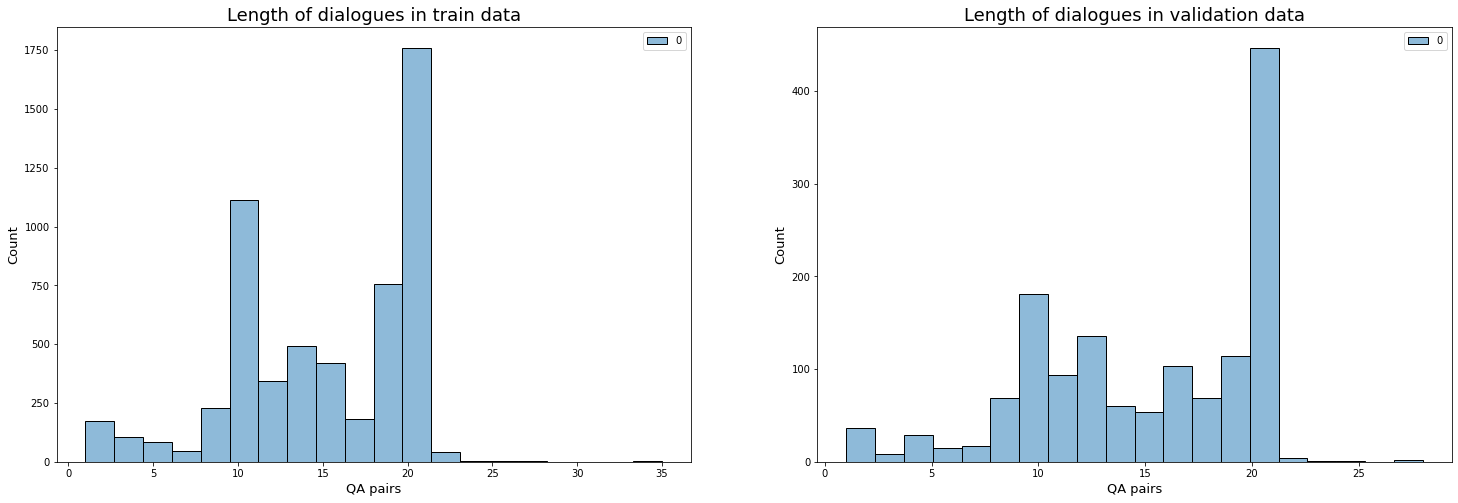

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize = (25,8))

sns.histplot([[len(train_df[train_df["id"]==id]) for id in train_df["id"].unique()]],ax = axs[0], bins = 20)
axs[0].set_title('Length of dialogues in train data', size = 18)
axs[0].set_xlabel('QA pairs', size = 13)
axs[0].set_ylabel('Count', size = 13)

sns.histplot([[len(val_df[val_df["id"]==id]) for id in val_df["id"].unique()]],ax = axs[1], bins = 20)
axs[1].set_title('Length of dialogues in validation data', size = 18)
axs[1].set_xlabel('QA pairs', size = 13)
axs[1].set_ylabel('Count', size = 13)

plt.show()

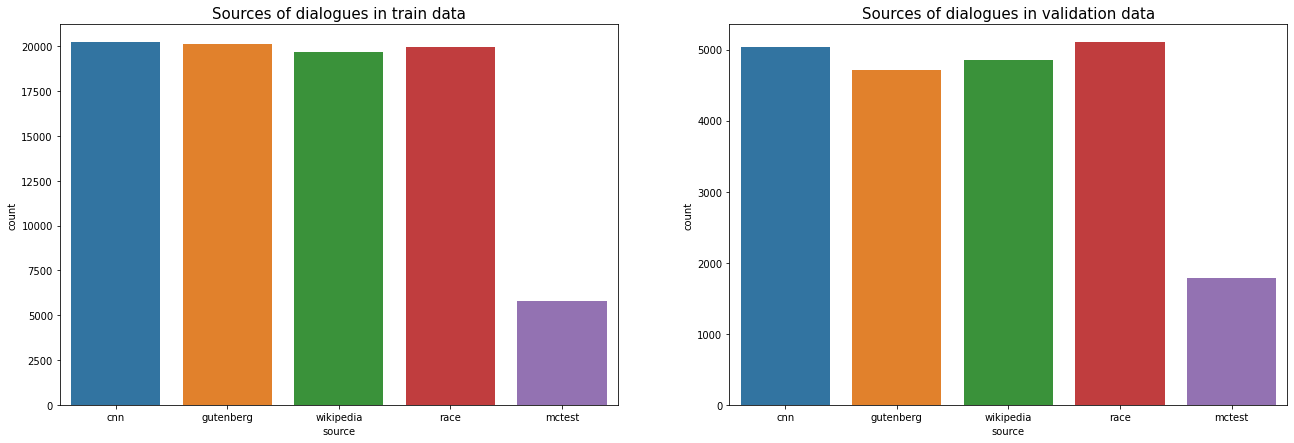

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(22, 7))

sources = train_df["source"].unique()

sns.countplot(x=train_df["source"], ax = axs[0], order = sources)
axs[0].set_title('Sources of dialogues in train data', size=15)

sns.countplot(x=val_df["source"], ax = axs[1], order = sources)
axs[1].set_title('Sources of dialogues in validation data', size=15)

plt.show()

It seems that even a random split mantains a good balance between different sources.

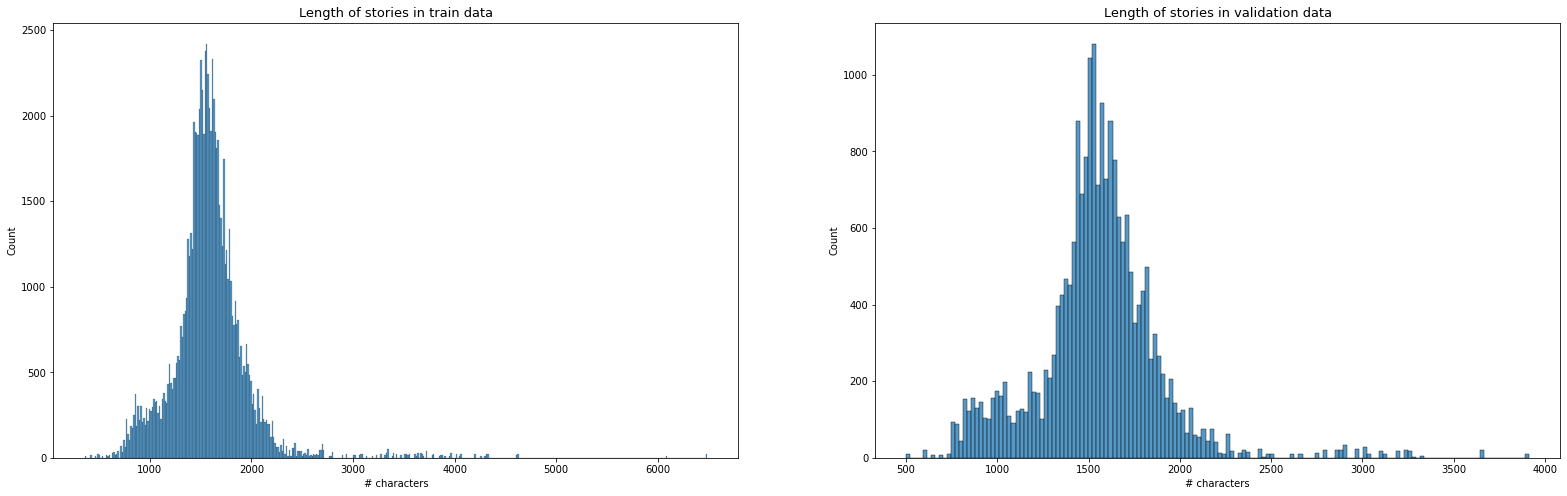

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(27, 8))
sns.histplot([len(context) for context in train_df["context"]], ax=axs[0])
axs[0].set_title('Length of stories in train data', size = 13)
axs[0].set_xlabel('# characters', size=10)

sns.histplot([len(context) for context in val_df["context"]], ax=axs[1])
axs[1].set_title('Length of stories in validation data', size = 13)
axs[1].set_xlabel('# characters', size=10)

plt.show()

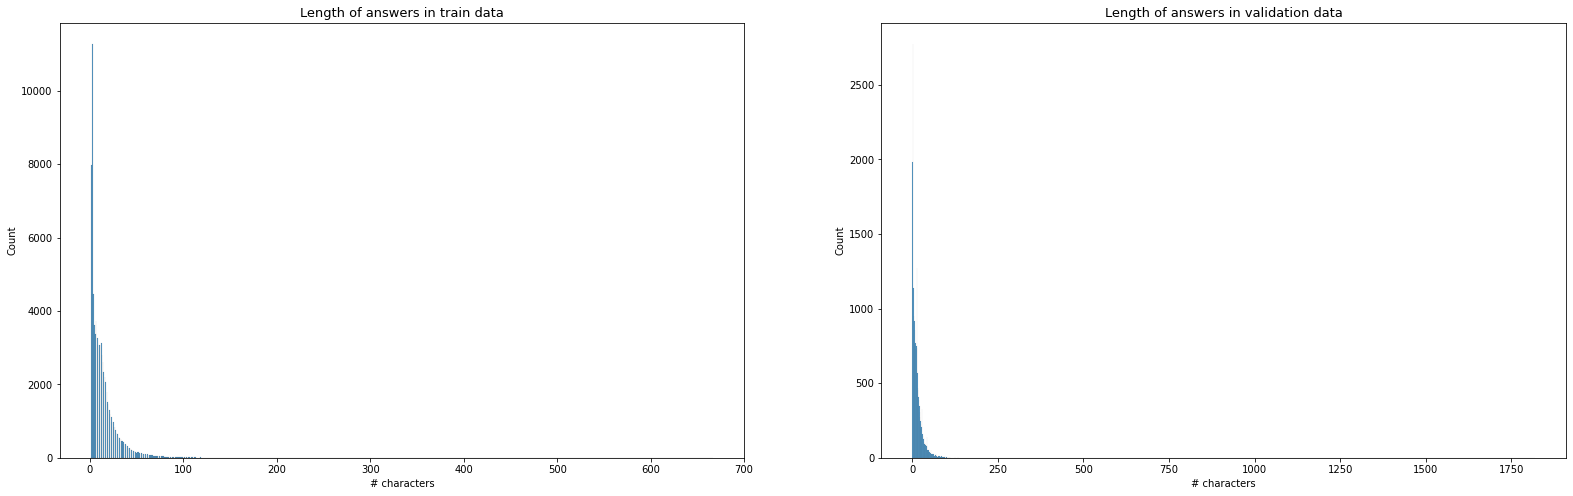

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(27, 8))

sns.histplot([len(ans) for ans in train_df["answer.text"]], ax=axs[0])
axs[0].set_title('Length of answers in train data', size = 13)
axs[0].set_xlabel('# characters', size=10)

sns.histplot([len(ans) for ans in val_df["answer.text"]], ax=axs[1])
axs[1].set_title('Length of answers in validation data', size = 13)
axs[1].set_xlabel('# characters', size=10)

plt.show()

## Preprocessing function

Here we define the preprocessing function. For an explanation of how it works, look at *Explanation of preprocessing fucntion* section.

In [ ]:
encoder_max_length = 512  # The maximum length of a feature (question and context)
decoder_max_length = 128  # The maximum length of an answer
doc_stride = 128          # The allowed overlap between two part of the context when splitting is performed.

In [ ]:
def get_preprocessing_function(conversational = False):
    # Return the preprocessing function that preprocess:
    # * only questions if conversational = False
    # * questions with history if conversational = True

    question_key = "question"
    if conversational:
      question_key = "conversational_"+question_key
    
    def prepare_features(examples):

        # When tokenizing conversational_question if the history is too long, substitute the 
        # conversational_question with the question 
        if question_key == "conversational_question":
          for i in range(len(examples["conversational_question"])):
            if len(tokenizer(examples["conversational_question"][i])["input_ids"]) + doc_stride > encoder_max_length:
              examples["conversational_question"][i] = examples["question"][i]

        # Tokenize our examples with truncation and padding, but keep the overflows using a stride. This results
        # in one example possible giving several features when a context is long, each of those features having a
        # context that overlaps a bit the context of the previous feature.
        tokenized_examples = tokenizer(
            list(examples[question_key]),    
            list(examples["context"]),
            return_tensors = 'pt',
            truncation="only_second",
            max_length=encoder_max_length,
            stride=doc_stride,
            return_overflowing_tokens=True,
            return_offsets_mapping=True,
            padding="max_length",
        )

        # Since one example might give us several features if it has a long context, we need a map from a feature to
        # its corresponding example. This key gives us just that.
        sample_mapping = tokenized_examples.pop("overflow_to_sample_mapping")

        # The offset mappings will give us a map from token to character position in the original context. This will
        # help us compute the start_positions and end_positions.
        offset_mapping = tokenized_examples.pop("offset_mapping")

        # Let's label those examples!
        answers = []
        for i, offsets in enumerate(offset_mapping):
            # We will label impossible answers with the tokenization of "UNANSWERABLE".
            input_ids = list(tokenized_examples["input_ids"][i])

            # Grab the sequence corresponding to that example (to know what is the context and what is the question).
            sequence_ids = tokenized_examples.sequence_ids(i)

            # One example can give several spans, this is the index of the example containing this span of text.
            sample_index = sample_mapping[i]

            # Start/end character index of the answer in the text.
            start_char = examples["answer.start_tkn"][sample_index]
            end_char = examples["answer.end_tkn"][sample_index]

            # Start token index of the current span in the text.
            token_start_index = 0
            while sequence_ids[token_start_index] != (1):
                token_start_index += 1

            # End token index of the current span in the text.
            token_end_index = len(input_ids) - 1
            while sequence_ids[token_end_index] != (1):
                token_end_index -= 1
            # Detect if the rationale is out of the span (in which case this feature is labeled with "UNANSWERABLE").
            if not (
                offsets[token_start_index][0] <= start_char
                and offsets[token_end_index][1] >= end_char
            ):
                answers.append("UNANSWERABLE")
            else:
                # Otherwise use the actual answer
                answers.append(examples['answer.text'][sample_index])

        tokenized_answers = tokenizer(answers,
                                      return_tensors = 'pt',
                                      max_length=decoder_max_length,
                                      padding="max_length",
                                      truncation = True)
        

        labels = tokenized_answers["input_ids"]

        # We have to substitute the padding token id with -100 in order to allow 
        # the loss function to ignore the padding
        padding_mask = labels==1
        padding_mask = padding_mask.type(torch.int32)
        padding_mask = padding_mask*(-101)
        tokenized_examples["labels"] = labels + padding_mask

        return tokenized_examples

    return prepare_features

In [ ]:
# Utility function to transform a label into a tokenization that can be decoded by the tokenizer
# i.e. substitute -100 with the padding token

def label_to_tok(labels):
  padding_mask = labels==-100
  padding_mask = padding_mask.type(torch.int32)
  padding_mask = padding_mask*(101)
  return labels + padding_mask

## Evaluation function

Here we define the evaluation function. It computes the f1 score, given the tokenized predictions and labels.

In [ ]:
from allennlp_models.rc.tools import squad
import torch

def compute_metrics(labels_ids, pred_ids):

    pred_str = tokenizer.batch_decode(pred_ids, skip_special_tokens=True)

    labels_ids[labels_ids == -100] = tokenizer.pad_token_id
    label_str = tokenizer.batch_decode(labels_ids, skip_special_tokens=True)
    
    scores = []
    for (pred, label) in zip(pred_str, label_str):
      scores.append(squad.compute_f1(pred,label))

    return {'f1': np.mean(scores)}

## Task 3-4-5: Model definition and QA function

Here we create a function to easily play with the model, passing to it a context and a question. If we want to pass even the history of the conversation it should be passed together with the question in the following format: 


> $$Q: question_0 \quad A: answer_0 \quad ... \quad A: answer_{t-1} \quad Q: {question_t}$$



We had to deal with some issues: when the tokenized input (context and question) exceeds the maximum input length of the model, we have to split the input into multiple features (This process will be better explained in the *Explanation of preprocessing function* section). As a consequence, the model will produce several answers for each diferent features and we have applied the following policy to decide which answer to keep: since the models have been trained to recognize if the answer is not in the provided context, and in that case to answer "UNANSWERABLE", if the answers to all the inputs are "UNANSWERABLE", the model will return "UNANSWERABLE", otherwise it will return the answer with the lowest perplexity between the answers different from "UNANSWERABLE". 

The intuition between this choice is that when the model understands that the answer is not present in the context, it is very confident in answering "UNANSWERABLE", while it is reasonable to suppose that if it produces an answer even if it is not present in the context, the perplexity will be high. 

We are going to use `distilroberta-base` as example for every explanation.
Firstly, we define the model as follows:

In [ ]:
model_checkpoint = 'distilroberta-base'  # or 'prajjwal1/bert-tiny'

In [ ]:
from transformers import EncoderDecoderModel, AutoTokenizer
import torch

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

tie_encoder_decoder = True if "distilroberta" in model_checkpoint else False
model = EncoderDecoderModel.from_encoder_decoder_pretrained(model_checkpoint, 
                                                            model_checkpoint, 
                                                            tie_encoder_decoder=tie_encoder_decoder)

# moving the model to the gpu if available
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

model.config.decoder_start_token_id = tokenizer.cls_token_id
model.config_eos_token_id = tokenizer.sep_token_id
model.config.pad_token_id = tokenizer.pad_token_id
model.config.vocab_size = model.config.encoder.vocab_size

Downloading:   0%|          | 0.00/480 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/316M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForCausalLM were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['roberta.encoder.layer.2.crossattention.self.query.bias', 'roberta.encoder.layer.4.crossattention.self.key.bias', 'roberta.encoder.layer.0.crossattention.self.

In [ ]:
def qa(question, context, num_beams = 3):

    # tokenize the question and context
    tokenized_example = tokenizer(
                question,    
                context,
                return_tensors = 'pt',
                truncation="only_second",
                max_length=encoder_max_length,
                stride=doc_stride,
                return_overflowing_tokens=True,
                return_offsets_mapping=True,
                padding="max_length",
            )

    input_ids = tokenized_example["input_ids"]
    attention_mask = tokenized_example["attention_mask"]

    answers = []
    losses = []
    for i in range(len(input_ids)):  # len(input_ids) is the number of different features produced by the input

      # generate the answer
      output = model.generate(input_ids = input_ids[i:i+1].to(device),
                              attention_mask = attention_mask[i:i+1].to(device),
                              num_beams = num_beams,
                              do_sample = False)
      
      answer = tokenizer.decode(output[0], skip_special_tokens = True)

      # if the answer is unanswerable discard the answer
      if "unanswerable" in answer.lower(): 
        continue

      answers.append(answer)

      padding_mask = output==1
      padding_mask = padding_mask.type(torch.int32)
      padding_mask = padding_mask*(-101)
      output = output + padding_mask

      with torch.no_grad():
        # calculate the perplexity of the answer
        logits = model(input_ids = input_ids[i:i+1].to(device),
                      attention_mask = attention_mask[i:i+1].to(device),
                      labels = output.to(device))
        
      losses.append(logits.loss)

    if len(answers) == 0:
      answer = "UNANSWERABLE"
    elif len(answers) == 1:
      answer = answers[0]

    # if there are several candidates answers select the one with lowest perplexity
    else:
      idx = np.argmin([loss.cpu() for loss in losses])
      answer = answers[idx]

    return answer  

## Explanation of preprocessing function

Downloading the tokenizer.

In [ ]:
model_checkpoint = "distilroberta-base"

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

Downloading:   0%|          | 0.00/480 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

The model has a maximum sequence length of 512 tokens. We have to find a way to deal with very long contexts. To deal with this, we will allow one (long) example in our dataset to give several input features, each of length shorter than the maximum length of the model. Also, just in case the answer lies at the point we split a long context, we allow some overlap between the features we generate controlled by the hyper-parameter `doc_stride`.

As the answers are shorter, we set the maximum length of the decoder to be lower.



In [ ]:
encoder_max_length = 512  # The maximum length of a feature (question and context)
decoder_max_length = 128  # The maximum length of an answer
doc_stride = 128          # The allowed overlap between two part of the context when splitting is performed.

To explain the preprocessing function we are going to use the pandas version of tre whole training dataset (before processing the splits).

In [ ]:
df = to_dataframe(train_json["data"])

Let's find one long example

In [ ]:
for i, example in df.iterrows():
    if len(tokenizer(example["question"], example["context"])["input_ids"]) > encoder_max_length:
        break
example = df.loc[i]

Token indices sequence length is longer than the specified maximum sequence length for this model (721 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
print(f'Length of the tokenization of the long example: {len(tokenizer(example["question"], example["context"])["input_ids"])}')

Length of the tokenization of the long example: 721


The argument `only_second` in truncation means that we only want to truncate the context, and never the question.

In [ ]:
tokenized_example = tokenizer(
    example["question"],
    example["context"],
    max_length= encoder_max_length,
    truncation="only_second",
    return_overflowing_tokens=True,
    return_offsets_mapping=True,
    stride=doc_stride,
)

In [ ]:
print(f'Lenghts of the two features extracted from the long example:  {[len(x) for x in tokenized_example["input_ids"]]}')

Lenghts of the two features extracted from the long example:  [512, 347]


Let's have a look to the features extracted by the example

In [ ]:
for x in tokenized_example["input_ids"][:2]:
    print(tokenizer.decode(x))
    print('-------------------------------------------')

<s>Who is the article about?</s></s>Every day Yang Hongwei takes the bus home from work, staring silently at the European-style villas, luxury cars and twinkling lights from the shopping center that he sees through the window. 

Yang works for a software company in Zhongguancun. He dreams of such a life, away from poverty, and that hope has kept him in Beijing for three years since he graduated from university. 

Soon Yang squeezes his way off the bus to the reality of his life: his home--a 10-square-metre room that costs 550 yuan(81 US dollars) or about one-fifth of his salary in rent every month. It's very cold inside the house as it has no central heating system. He has to stand the long and cold winter. Determined to achieve his dream, Yang says he has changed jobs "numerous" times in the past three years and is considering quitting his present job. 

Yang's frustration over his life as a migrant is shared by many other graduates that have moved into big cities. Together they have 

`offset_mapping` gives the corresponding start and end character in the original text for each token in our input IDs. The very first token (\<s>) has (0, 0) because it doesn't correspond to any part of the question/answer, then the second token is the same as the characters 0 to 3 of the question, and so on:

In [ ]:
print(tokenized_example["offset_mapping"][0])

[(0, 0), (0, 3), (4, 6), (7, 10), (11, 18), (19, 24), (24, 25), (0, 0), (0, 0), (0, 5), (6, 9), (10, 14), (15, 19), (19, 22), (23, 28), (29, 32), (33, 36), (37, 41), (42, 46), (47, 51), (51, 52), (53, 60), (61, 69), (70, 72), (73, 76), (77, 85), (85, 86), (86, 91), (92, 96), (96, 98), (99, 100), (101, 107), (108, 112), (113, 116), (117, 119), (119, 122), (122, 126), (127, 133), (134, 138), (139, 142), (143, 151), (152, 158), (159, 163), (164, 166), (167, 171), (172, 179), (180, 183), (184, 190), (190, 191), (192, 192), (192, 193), (193, 194), (194, 198), (199, 204), (205, 208), (209, 210), (211, 219), (220, 227), (228, 230), (231, 233), (233, 236), (236, 238), (238, 241), (241, 243), (243, 244), (245, 247), (248, 254), (255, 257), (258, 262), (263, 264), (265, 269), (269, 270), (271, 275), (276, 280), (281, 288), (288, 289), (290, 293), (294, 298), (299, 303), (304, 307), (308, 312), (313, 316), (317, 319), (320, 327), (328, 331), (332, 337), (338, 343), (344, 349), (350, 352), (353, 3

In [ ]:
print(tokenized_example["offset_mapping"][1])

[(0, 0), (0, 3), (4, 6), (7, 10), (11, 18), (19, 24), (24, 25), (0, 0), (0, 0), (1697, 1703), (1703, 1704), (1705, 1709), (1710, 1712), (1713, 1721), (1721, 1722), (1723, 1734), (1734, 1735), (1736, 1745), (1746, 1749), (1750, 1760), (1760, 1761), (1762, 1764), (1765, 1773), (1773, 1774), (1775, 1776), (1776, 1777), (1777, 1778), (1779, 1786), (1787, 1789), (1790, 1793), (1794, 1795), (1795, 1799), (1799, 1800), (1801, 1805), (1806, 1808), (1809, 1814), (1815, 1816), (1817, 1823), (1823, 1825), (1826, 1832), (1833, 1841), (1842, 1844), (1845, 1846), (1846, 1847), (1847, 1848), (1849, 1856), (1857, 1859), (1860, 1864), (1864, 1865), (1866, 1870), (1871, 1875), (1876, 1879), (1880, 1888), (1889, 1897), (1898, 1901), (1902, 1905), (1906, 1912), (1913, 1920), (1921, 1926), (1927, 1936), (1937, 1947), (1947, 1948), (1949, 1952), (1953, 1955), (1956, 1963), (1964, 1968), (1969, 1974), (1975, 1982), (1983, 1987), (1988, 1993), (1994, 1996), (1997, 2002), (2003, 2015), (2015, 2016), (2017, 202

In [ ]:
first_token_id = tokenized_example["input_ids"][0][1]
offsets = tokenized_example["offset_mapping"][0][1]
print(
    tokenizer.convert_ids_to_tokens([first_token_id])[0],
    example["question"][offsets[0] : offsets[1]],
)

Who Who


So we can use this mapping to find the position of the start and end tokens of our answer in a given feature. We just have to distinguish which parts of the offsets correspond to the question and which part correspond to the context, this is where the `sequence_ids` method of our `tokenized_example` can be useful:

In [ ]:
sequence_ids = tokenized_example.sequence_ids()
print(sequence_ids)

[None, 0, 0, 0, 0, 0, 0, None, None, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

It returns None for the special tokens, then 0 or 1 depending on whether the corresponding token comes from the first sentence past (the question) or the second (the context). Now with all of this, we can understand in which of the input features the corresponding the rationale (that contains the answer) is contained:

In [ ]:
start_char = example["answer.start_tkn"]
end_char = example["answer.end_tkn"]

# Start token index of the current span in the text.
token_start_index = 0
while sequence_ids[token_start_index] != 1:
    token_start_index += 1

for i in range(len(tokenized_example["input_ids"])):
  # End token index of the current span in the text.
  token_end_index = len(tokenized_example["input_ids"][i]) - 1
  while sequence_ids[token_end_index] != 1:
      token_end_index -= 1

  # Detect if the rationale is out of the span.
  offsets = tokenized_example["offset_mapping"][i]
  if (
      offsets[token_start_index][0] <= start_char
      and offsets[token_end_index][1] >= end_char
  ):
      print(f"The answer is in the feature {i+1}.")
  else:
      print(f"The answer is not in the feature {i+1}.")

The answer is in the feature 1.
The answer is not in the feature 2.


Now let's put everything together in one function we will apply to our training set. In the case of impossible answers (the answer is in another feature given by an example with a long context), we set the answer to be 'UNANSWERABLE'.

As last thing, We have discovered that if the conversational question is too long (due to a very long answer in the histiory), and the tokens left to encode the context are less than the `doc_stride`, the kernel crashes when we call the tokenizer function. As a consequence we have decided in those cases to not provide the history of the conversation to the model.





In [ ]:
too_long_idx = []

for i, row in df.iterrows():
  if len(tokenizer(row["conversational_question"])["input_ids"]) + doc_stride >= encoder_max_length:
    too_long_idx.append(i)

Let's see an example:

In [ ]:
for i, row in df.loc[too_long_idx].iterrows():
  print(row["conversational_question"], '\n')

Q: And another? A: Eric Q: The last? A: At the age of sixteen, I went on my first volunteer program in West Virginia to repair or build homes for poor families. When we arrived, we discovered that the family we were going to help was living in a trailer that was in poor condition, no bigger than two parking spaces. A group of people had been working on it for two weeks, but every time they finished one problem, another appeared. We soon decided that the only way was to build a new house. It was something unusual because normally our goal was to repair old homes. The family was pleased with their new house that was 20 by 30 feet with three bedrooms, a bath and a kitchen. On Tuesday of that week, I asked the family's three boys, Josh, Eric and Ryan, "What do you want for your new room?" Kids in the families we had helped usually wanted toys or posters, so we were surprised when Josh, the oldest boy said, "We just want beds." The boys had never slept in a bed. That night we had a meeting 

We can put everything together in the following function. In order to easily build the preprocessing function for the two different tasks (questions with and without history), we have created a function that returns two different preprocessing functions depending on the input parameter `conversational`.


In [ ]:
def get_preprocessing_function(conversational = False):
    # Return the preprocessing function that preprocess:
    # only questions if conversational = True
    # questions with history if conversational = True

    question_key = "question"
    if conversational:
      question_key = "conversational_"+question_key
    
    def prepare_features(examples):

        # When tokenizing conversational_question if the history is too long, substitute the 
        # conversational_question with the question 
        if question_key == "conversational_question":
          for i in range(len(examples["conversational_question"])):
            if len(tokenizer(examples["conversational_question"][i])["input_ids"]) + doc_stride > encoder_max_length:
              examples["conversational_question"][i] = examples["question"][i]

        # Tokenize our examples with truncation and padding, but keep the overflows using a stride. This results
        # in one example possible giving several features when a context is long, each of those features having a
        # context that overlaps a bit the context of the previous feature.
        tokenized_examples = tokenizer(
            list(examples[question_key]),    
            list(examples["context"]),
            return_tensors = 'pt',
            truncation="only_second",
            max_length=encoder_max_length,
            stride=doc_stride,
            return_overflowing_tokens=True,
            return_offsets_mapping=True,
            padding="max_length",
        )

        # Since one example might give us several features if it has a long context, we need a map from a feature to
        # its corresponding example. This key gives us just that.
        sample_mapping = tokenized_examples.pop("overflow_to_sample_mapping")

        # The offset mappings will give us a map from token to character position in the original context. This will
        # help us compute the start_positions and end_positions.
        offset_mapping = tokenized_examples.pop("offset_mapping")

        # Let's label those examples!
        answers = []
        for i, offsets in enumerate(offset_mapping):
            # We will label impossible answers with the tokenization of "UNANSWERABLE" token.
            input_ids = list(tokenized_examples["input_ids"][i])

            # Grab the sequence corresponding to that example (to know what is the context and what is the question).
            sequence_ids = tokenized_examples.sequence_ids(i)

            # One example can give several spans, this is the index of the example containing this span of text.
            sample_index = sample_mapping[i]

            # Start/end character index of the answer in the text.
            start_char = examples["answer.start_tkn"][sample_index]
            end_char = examples["answer.end_tkn"][sample_index]

            # Start token index of the current span in the text.
            token_start_index = 0
            while sequence_ids[token_start_index] != (1):
                token_start_index += 1

            # End token index of the current span in the text.
            token_end_index = len(input_ids) - 1
            while sequence_ids[token_end_index] != (1):
                token_end_index -= 1
            # Detect if the rationale is out of the span (in which case this feature is labeled with "UNANSWERABLE").
            if not (
                offsets[token_start_index][0] <= start_char
                and offsets[token_end_index][1] >= end_char
            ):
                answers.append("UNANSWERABLE")
            else:
                # Otherwise use the actual answer
                answers.append(examples['answer.text'][sample_index])

        tokenized_answers = tokenizer(answers,
                                      return_tensors = 'pt',
                                      max_length=decoder_max_length,
                                      padding="max_length",
                                      truncation = True)
        
        #tokenized_examples["decoder_input_ids"] = tokenized_answers["input_ids"]
        #tokenized_examples["decoder_attention_mask"] = tokenized_answers["attention_mask"]

        labels = tokenized_answers["input_ids"]
        # We have to substitute the padding token id with -100 in order to make 
        # the loss function ignore the padding

        padding_mask = labels==1
        padding_mask = padding_mask.type(torch.int32)
        padding_mask = padding_mask*(-101)

        tokenized_examples["labels"] = labels + padding_mask
        return tokenized_examples

    return prepare_features

In [ ]:
# Utility function to transform a label into a tokenization that can be decoded by the tokenizer

def label_to_tok(labels):
  padding_mask = labels==-100
  padding_mask = padding_mask.type(torch.int32)
  padding_mask = padding_mask*(101)
  return labels + padding_mask

Let's see what happens if I pass a too long context. For this purpose we are going to use the datasets version of the data, as the preprocessing funciton will be applied to that object.

In [ ]:
(train_df, val_df, datasets), datasets = get_data(seed=42, 
                                                  reduce_factor=1)

In [ ]:
prepare_features = get_preprocessing_function(conversational = False)

In [ ]:
i=0
for i, example in train_df.iterrows():
    if len(tokenizer(example["question"], example["context"])["input_ids"]) > encoder_max_length:
        break

example = datasets['train'][i:i+1]
features = prepare_features(example)

In [ ]:
for i in (0,1):
  print(tokenizer.decode(features['input_ids'][i]))
  print(tokenizer.decode(label_to_tok(features['labels'][i])))
  print('-------------------------')


<s>Who is Katy?</s></s>The following are selected contributors' notes for an essay collection. KATY BUTLER, a 2004 finalist for a National Magazine Award, has written for The New Yorker, the New York Times, Mother Jones, Salon, Tricycle, and other magazines. She was born in South Africa and raised in England, and came to the United States with her family at the age of eight. "Everything Is Holy," her essay about nature worship, Buddhism, and ecology, was selected for Best Buddhist Writing 2006. In 2009 she won a literary award from the Elizabeth George Foundation. "What Broke My Father's Heart" was named a "notable narrative" by the Nieman Foundation for Journalism at Harvard, won a first-place award from the Association of Health Care Journalists, and was named one of the 100 Best Magazine Articles of All Time. Butler has taught narrative nonfiction at Nieman Foundation conferences and memoir writing at Esalen Institute. Her current book project is Knocking on Heaven's Door: A Journey

In [ ]:
tokenized_datasets = datasets.map(
    prepare_features, batched=True, remove_columns=datasets['train'].column_names
)


tokenized_datasets.set_format(
    type="torch", columns=["input_ids", "attention_mask", "labels"],
)

  0%|          | 0/86 [00:00<?, ?ba/s]

  0%|          | 0/22 [00:00<?, ?ba/s]

  0%|          | 0/8 [00:00<?, ?ba/s]

In [ ]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 88873
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 22055
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 8162
    })
})

Let's see how many unanswerable features are present in the train and validation datasets.

In [ ]:
uns_token = tokenized_answers = tokenizer("UNANSWERABLE",
                                          return_tensors = 'pt',
                                          max_length=decoder_max_length,
                                          padding="max_length",
                                          truncation = True)['input_ids']


for split in ['train', 'validation']:
  perc_of_uns = np.sum([x.all().item() for x in (label_to_tok(tokenized_datasets[split]['labels']) == uns_token)]) / len(tokenized_datasets[split])
  print(f"The percentage of UNANSWERABLE qa pairs in {split} is: {round(perc_of_uns*100, 3)}%")

The percentage of UNANSWERABLE qa pairs in train is: 3.03%
The percentage of UNANSWERABLE qa pairs in validation is: 2.258%


## Explanation of training loop

In this section we are going to run and explain the training loop.

Here we use the `distillroberta` model and we are going to train it in the whole training dataset (the training split computed by us with 42 as random seed).

In [ ]:
from transformers import EncoderDecoderModel

model = EncoderDecoderModel.from_encoder_decoder_pretrained(model_checkpoint, model_checkpoint)#, tie_encoder_decoder=True)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

model.config.decoder_start_token_id = tokenizer.cls_token_id
model.config_eos_token_id = tokenizer.sep_token_id
model.config.pad_token_id = tokenizer.pad_token_id
model.config.vocab_size = model.config.encoder.vocab_size

In [ ]:
print(f"Number of parameters: {model.num_parameters()}")

Number of parameters: 8935226


We are going to build the dataloaders for training and evaluating the model. We have choosen a very small `batch_size`, 8,  to not go out of memory in the GPU.




In [ ]:
from torch.utils.data import DataLoader 
batch_size = 8

train_dataloader = DataLoader(tokenized_datasets['train'], 
                              shuffle=True, 
                              batch_size=batch_size)

val_dataloader = DataLoader(tokenized_datasets['validation'], 
                            batch_size=batch_size)

Here it is the customized training loop.

In [ ]:
import torch
from tqdm.notebook import tqdm

epochs = 3

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

for epoch in range(epochs):  # loop over the dataset multiple times
   print(f"------------ EPOCH:{epoch+1} ------------")
   # train + evaluate on training data
   val_f1 = 0.0
   losses = []
   for i,batch in enumerate(tqdm(train_dataloader)):
      model.train()
      # get the inputs; 
      input_ids = batch["input_ids"].to(device)
      attention_mask = batch["attention_mask"].to(device)
      labels = batch["labels"].to(device)

      # zero the parameter gradients
      optimizer.zero_grad()

      # forward + backward + optimize
      outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
      loss = outputs.loss
      losses.append(loss.item())
      #if i % 50 == 0:
      print("\rLoss:", np.mean(losses), end='')
      loss.backward()
      optimizer.step()

   # evaluate (batch generation)
   model.eval()
   print('\nEVALUATING...')
   val_f1 = []
   for eval_batch in tqdm(val_dataloader):
       outputs = model.generate(eval_batch["input_ids"].to(device))
       # compute metrics
       metrics = compute_metrics(pred_ids=outputs, labels_ids=eval_batch["labels"])
       val_f1.append(metrics["f1"])
  
   print("Val F1:", np.mean(val_f1))

### Pushing the model to the hub

To push the model to the hub, we have to login with a WRITE token, create a repository, save the model in the local directory and than uploading the folder with the model saved. 

In [ ]:
repo_name = f"Davidai/distillroberta_whole_coqa__non_conv_42"

# creating the repository in the hub 
create_repo(repo_name, repo_type='model', private= False)

# saving the model locally
model.save_pretrained('model')
tokenizer.save_pretrained('model')

# calling the HuggingFace API
api = HfApi()

# uploading the folder
api.upload_folder(
    folder_path="model",
    repo_type="model",
    repo_id=repo_name
)

## Task 6: Training loops - Roberta - Non Conversational

Here we train the distilroberta model in the non conversational task with the three random seeds: 42, 2022 and 1337.

In [ ]:
from transformers import AutoTokenizer

model_checkpoint = 'distilroberta-base'

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

prepare_train_features = get_preprocessing_function(conversational = False)

Downloading:   0%|          | 0.00/480 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

In [ ]:
from torch.utils.data import DataLoader 
from transformers import EncoderDecoderModel
from tqdm.notebook import tqdm
from huggingface_hub import create_repo, delete_repo, HfApi


for seed in [42, 2022, 1337]:
  
  print(f"#######################################\n############# SEED : {seed} #############\n#######################################\n\n")

  ### SET THE SEED ###
  set_reproducibility(seed)

  ########################
  ### PREPARE THE DATA ###
  ########################

  print("##### PREPARING THE DATASETS #####\n")

  datasets = get_data(seed = seed, 
                      type = "datasets",
                      reduce_factor = 2)
  
  print(f"Shapes of the datasets: {datasets.shape}\n")
  
  tokenized_datasets = datasets.map(
      prepare_train_features, batched=True, remove_columns=datasets['train'].column_names, 
  )
  
  tokenized_datasets.set_format(
      type="torch", columns=["input_ids", "attention_mask", "labels"],
  )

  batch_size = 8

  train_dataloader = DataLoader(tokenized_datasets['train'], 
                                shuffle=True, 
                                batch_size=batch_size)

  val_dataloader = DataLoader(tokenized_datasets['validation'], 
                              batch_size=batch_size)
  
  #########################
  ### PREPARE THE MODEL ###
  #########################

  print(f"\n##### INITIALIZING THE MODEL #####\n")
  model = EncoderDecoderModel.from_encoder_decoder_pretrained(model_checkpoint, model_checkpoint, tie_encoder_decoder=True)
  device = "cuda" if torch.cuda.is_available() else "cpu"
  model.to(device)

  model.config.decoder_start_token_id = tokenizer.cls_token_id
  model.config_eos_token_id = tokenizer.sep_token_id
  model.config.pad_token_id = tokenizer.pad_token_id
  model.config.vocab_size = model.config.encoder.vocab_size

  #########################
  ##### TRAINING LOOP #####
  #########################

  print(f"\n##### TRAINING THE MODEL #####\n")

  epochs = 3

  optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

  for epoch in range(epochs):  # loop over the dataset multiple times
    print(f"------------ EPOCH:{epoch+1} ------------")
    # train + evaluate on training data
    val_f1 = 0.0
    losses = []
    for i,batch in enumerate(tqdm(train_dataloader)):
        model.train()
        # get the inputs; 
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        losses.append(loss.item())
        #if i % 50 == 0:
        print("\rLoss:", np.mean(losses), end='')
        loss.backward()
        optimizer.step()

    # evaluate (batch generation)
    model.eval()
    print('\nEVALUATING...')
    val_f1 = []
    for eval_batch in tqdm(val_dataloader):
        outputs = model.generate(eval_batch["input_ids"].to(device))
        # compute metrics
        metrics = compute_metrics(pred_ids=outputs, labels_ids=eval_batch["labels"])
        val_f1.append(metrics["f1"])
    
    print("Val F1:", np.mean(val_f1))

  ##############################
  ##### PUSHING TO THE HUB #####
  ##############################

  print(f"\n##### PUSHING TO THE HUB #####\n")

  repo_name = f"Davidai/distillroberta_coqa_non_conv_{seed}"
  create_repo(repo_name, repo_type='model', private= False)

  model.save_pretrained('model')
  tokenizer.save_pretrained('model')

  api = HfApi()

  api.upload_folder(
      folder_path="model",
      repo_type="model",
      repo_id=repo_name
  )

  print(f"Model saved to: {repo_name}, well done !!\n\n")



#######################################
############# SEED : 42 #############
#######################################


##### PREPARING THE DATASETS #####

Shapes of the datasets: {'train': (42903, 8), 'validation': (10739, 8), 'test': (7918, 8)}



  0%|          | 0/43 [00:00<?, ?ba/s]

  0%|          | 0/11 [00:00<?, ?ba/s]

  0%|          | 0/8 [00:00<?, ?ba/s]


##### INITIALIZING THE MODEL #####



Downloading:   0%|          | 0.00/316M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForCausalLM were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['roberta.encoder.layer.1.crossattention.output.dense.weight', 'roberta.encoder.layer.1.crossattention.self.value.bias', 'roberta.encoder.layer.4.crossattention


##### TRAINING THE MODEL #####

------------ EPOCH:1 ------------


  0%|          | 0/5553 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:533: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPRECATION_WARNING, FutureWarning)


Loss: 4.010610143365075
EVALUATING...


  0%|          | 0/1379 [00:00<?, ?it/s]

Val F1: 0.13842958834306254
------------ EPOCH:2 ------------


  0%|          | 0/5553 [00:00<?, ?it/s]

Loss: 2.752883202048995
EVALUATING...


  0%|          | 0/1379 [00:00<?, ?it/s]

Val F1: 0.2420619743807199
------------ EPOCH:3 ------------


  0%|          | 0/5553 [00:00<?, ?it/s]

Loss: 2.070882185276577
EVALUATING...


  0%|          | 0/1379 [00:00<?, ?it/s]

Val F1: 0.297904808839071

##### PUSHING TO THE HUB #####

Model saved to: Davidai/distillroberta_coqa_non_conv_42, well done !!


#######################################
############# SEED : 2022 #############
#######################################


##### PREPARING THE DATASETS #####

Shapes of the datasets: {'train': (43002, 8), 'validation': (10641, 8), 'test': (7918, 8)}



  0%|          | 0/44 [00:00<?, ?ba/s]

  0%|          | 0/11 [00:00<?, ?ba/s]

  0%|          | 0/8 [00:00<?, ?ba/s]


##### INITIALIZING THE MODEL #####



Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForCausalLM were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['roberta.encoder.layer.1.crossattention.output.dense.weight', 'roberta.encoder.layer.1.crossattention.self.value.bias', 'roberta.encoder.layer.4.crossattention


##### TRAINING THE MODEL #####

------------ EPOCH:1 ------------


  0%|          | 0/5556 [00:00<?, ?it/s]

Loss: 4.041641818975012
EVALUATING...


  0%|          | 0/1374 [00:00<?, ?it/s]

Val F1: 0.13757452066684442
------------ EPOCH:2 ------------


  0%|          | 0/5556 [00:00<?, ?it/s]

Loss: 2.807039026286295
EVALUATING...


  0%|          | 0/1374 [00:00<?, ?it/s]

Val F1: 0.2126443626500527
------------ EPOCH:3 ------------


  0%|          | 0/5556 [00:00<?, ?it/s]

Loss: 2.116109667170211
EVALUATING...


  0%|          | 0/1374 [00:00<?, ?it/s]

Val F1: 0.2767212062032011

##### PUSHING TO THE HUB #####

Model saved to: Davidai/distillroberta_coqa_non_conv_2022, well done !!


#######################################
############# SEED : 1337 #############
#######################################


##### PREPARING THE DATASETS #####

Shapes of the datasets: {'train': (42776, 8), 'validation': (10867, 8), 'test': (7918, 8)}



  0%|          | 0/43 [00:00<?, ?ba/s]

  0%|          | 0/11 [00:00<?, ?ba/s]

  0%|          | 0/8 [00:00<?, ?ba/s]


##### INITIALIZING THE MODEL #####



Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForCausalLM were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['roberta.encoder.layer.1.crossattention.output.dense.weight', 'roberta.encoder.layer.1.crossattention.self.value.bias', 'roberta.encoder.layer.4.crossattention


##### TRAINING THE MODEL #####

------------ EPOCH:1 ------------


  0%|          | 0/5531 [00:00<?, ?it/s]

Loss: 4.085860958637758
EVALUATING...


  0%|          | 0/1403 [00:00<?, ?it/s]

Val F1: 0.14539545709403
------------ EPOCH:2 ------------


  0%|          | 0/5531 [00:00<?, ?it/s]

Loss: 2.842973527048794
EVALUATING...


  0%|          | 0/1403 [00:00<?, ?it/s]

Val F1: 0.25451699616381096
------------ EPOCH:3 ------------


  0%|          | 0/5531 [00:00<?, ?it/s]

Loss: 2.1429026178265325
EVALUATING...


  0%|          | 0/1403 [00:00<?, ?it/s]

Val F1: 0.3079930310588955

##### PUSHING TO THE HUB #####

Model saved to: Davidai/distillroberta_coqa_non_conv_1337, well done !!




## Task 6: Training loops - Roberta - Conversational

Here we train the distilroberta model in the conversational task with the three random seeds: 42, 2022 and 1337.

In [ ]:
from transformers import AutoTokenizer

model_checkpoint = 'distilroberta-base'

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

prepare_train_features = get_preprocessing_function(conversational = False)

In [ ]:
from torch.utils.data import DataLoader 
from transformers import EncoderDecoderModel
from tqdm.notebook import tqdm
from huggingface_hub import create_repo, delete_repo, HfApi


for seed in [42, 2022, 1337]:
  
  print(f"#######################################\n############# SEED : {seed} #############\n#######################################\n\n")

  ### SET THE SEED ###
  set_reproducibility(seed)

  ########################
  ### PREPARE THE DATA ###
  ########################

  print("##### PREPARING THE DATASETS #####\n")

  datasets = get_data(seed = seed, 
                      type = "datasets",
                      reduce_factor = 2)

  print(f"Shapes of the datasets: {datasets.shape}\n")
  
  tokenized_datasets = datasets.map(
      prepare_train_features, batched=True, remove_columns=datasets['train'].column_names, 
  )
  
  tokenized_datasets.set_format(
      type="torch", columns=["input_ids", "attention_mask", "labels"],
  )

  batch_size = 8

  train_dataloader = DataLoader(tokenized_datasets['train'], 
                                shuffle=True, 
                                batch_size=batch_size)

  val_dataloader = DataLoader(tokenized_datasets['validation'], 
                              batch_size=batch_size)
  
  #########################
  ### PREPARE THE MODEL ###
  #########################

  print(f"\n##### INITIALIZING THE MODEL #####\n")
  model = EncoderDecoderModel.from_encoder_decoder_pretrained(model_checkpoint, model_checkpoint, tie_encoder_decoder=True)
  device = "cuda" if torch.cuda.is_available() else "cpu"
  model.to(device)

  model.config.decoder_start_token_id = tokenizer.cls_token_id
  model.config_eos_token_id = tokenizer.sep_token_id
  model.config.pad_token_id = tokenizer.pad_token_id
  model.config.vocab_size = model.config.encoder.vocab_size

  #########################
  ##### TRAINING LOOP #####
  #########################

  print(f"\n##### TRAINING THE MODEL #####\n")

  epochs = 3

  optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

  for epoch in range(epochs):  # loop over the dataset multiple times
    print(f"------------ EPOCH:{epoch+1} ------------")
    # train + evaluate on training data
    val_f1 = 0.0
    losses = []
    for i,batch in enumerate(tqdm(train_dataloader)):
        model.train()
        # get the inputs; 
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        losses.append(loss.item())
        #if i % 50 == 0:
        print("\rLoss:", np.mean(losses), end='')
        loss.backward()
        optimizer.step()

    # evaluate (batch generation)
    model.eval()
    print('\nEVALUATING...')
    val_f1 = []
    for eval_batch in tqdm(val_dataloader):
        outputs = model.generate(eval_batch["input_ids"].to(device))
        # compute metrics
        metrics = compute_metrics(pred_ids=outputs, labels_ids=eval_batch["labels"])
        val_f1.append(metrics["f1"])
    
    print("Val F1:", np.mean(val_f1))

  ##############################
  ##### PUSHING TO THE HUB #####
  ##############################

  print(f"\n##### PUSHING TO THE HUB #####\n")

  repo_name = f"Davidai/distillroberta_coqa_conv_{seed}"
  create_repo(repo_name, repo_type='model', private= False)

  model.save_pretrained('model')
  tokenizer.save_pretrained('model')

  api = HfApi()

  api.upload_folder(
      folder_path="model",
      repo_type="model",
      repo_id=repo_name
  )

  print(f"Model saved to: {repo_name}, well done !!\n\n")



#######################################
############# SEED : 1337 #############
#######################################


##### PREPARING THE DATASETS #####

42776


  0%|          | 0/43 [00:00<?, ?ba/s]

Shapes of the datasets: {'train': (42775, 9), 'validation': (10867, 9), 'test': (7918, 9)}



  0%|          | 0/43 [00:00<?, ?ba/s]

  0%|          | 0/11 [00:00<?, ?ba/s]

  0%|          | 0/8 [00:00<?, ?ba/s]


##### INITIALIZING THE MODEL #####



Downloading:   0%|          | 0.00/316M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForCausalLM were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['roberta.encoder.layer.4.crossattention.self.query.bias', 'roberta.encoder.layer.4.crossattention.output.dense.bias', 'roberta.encoder.layer.5.crossattention.o


##### TRAINING THE MODEL #####

------------ EPOCH:1 ------------


  0%|          | 0/5659 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:533: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPRECATION_WARNING, FutureWarning)


Loss: 3.910523503644872
EVALUATING...


  0%|          | 0/1422 [00:00<?, ?it/s]

Val F1: 0.14827675777624852
------------ EPOCH:2 ------------


  0%|          | 0/5659 [00:00<?, ?it/s]

Loss: 2.6785540434028765
EVALUATING...


  0%|          | 0/1422 [00:00<?, ?it/s]

Val F1: 0.2924200690387892
------------ EPOCH:3 ------------


  0%|          | 0/5659 [00:00<?, ?it/s]

Loss: 1.8923444816703445
EVALUATING...


  0%|          | 0/1422 [00:00<?, ?it/s]

Val F1: 0.3528683647601997

##### PUSHING TO THE HUB #####

Model saved to: Davidai/distillroberta_coqa_conv_1337, well done !!




## Task 6: Training loops - Bert-tiny - Non Conversational

Here we train the bert-tiny model in the non conversational task with the three random seeds: 42, 2022 and 1337.

In [ ]:
from transformers import AutoTokenizer

model_checkpoint = 'prajjwal1/bert-tiny'

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

prepare_train_features = get_preprocessing_function(conversational = False)

In [ ]:
from torch.utils.data import DataLoader 
from transformers import EncoderDecoderModel
from tqdm.notebook import tqdm
from huggingface_hub import create_repo, delete_repo, HfApi


for seed in [42, 2022, 1337]:
  
  print(f"#######################################\n############# SEED : {seed} #############\n#######################################\n\n")

  ### SET THE SEED ###
  set_reproducibility(seed)

  ########################
  ### PREPARE THE DATA ###
  ########################

  print("##### PREPARING THE DATASETS #####\n")

  datasets = get_data(seed = seed, 
                      type = "datasets",
                      reduce_factor = 1)
  
  print(f"Shapes of the datasets: {datasets.shape}\n")
  
  tokenized_datasets = datasets.map(
      prepare_train_features, batched=True, remove_columns=datasets['train'].column_names, 
  )
  
  tokenized_datasets.set_format(
      type="torch", columns=["input_ids", "attention_mask", "labels"],
  )

  batch_size = 8

  train_dataloader = DataLoader(tokenized_datasets['train'], 
                                shuffle=True, 
                                batch_size=batch_size)

  val_dataloader = DataLoader(tokenized_datasets['validation'], 
                              batch_size=batch_size)
  
  #########################
  ### PREPARE THE MODEL ###
  #########################

  print(f"\n##### INITIALIZING THE MODEL #####\n")
  model = EncoderDecoderModel.from_encoder_decoder_pretrained(model_checkpoint, model_checkpoint)
  device = "cuda" if torch.cuda.is_available() else "cpu"
  model.to(device)

  model.config.decoder_start_token_id = tokenizer.cls_token_id
  model.config_eos_token_id = tokenizer.sep_token_id
  model.config.pad_token_id = tokenizer.pad_token_id
  model.config.vocab_size = model.config.encoder.vocab_size

  #########################
  ##### TRAINING LOOP #####
  #########################

  print(f"\n##### TRAINING THE MODEL #####\n")

  epochs = 3

  optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

  for epoch in range(epochs):  # loop over the dataset multiple times
    print(f"------------ EPOCH:{epoch+1} ------------")
    # train + evaluate on training data
    val_f1 = 0.0
    losses = []
    for i,batch in enumerate(tqdm(train_dataloader)):
        model.train()
        # get the inputs; 
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        losses.append(loss.item())
        #if i % 50 == 0:
        print("\rLoss:", np.mean(losses), end='')
        loss.backward()
        optimizer.step()

    # evaluate (batch generation)
    model.eval()
    print('\nEVALUATING...')
    val_f1 = []
    for eval_batch in tqdm(val_dataloader):
        outputs = model.generate(eval_batch["input_ids"].to(device))
        # compute metrics
        metrics = compute_metrics(pred_ids=outputs, labels_ids=eval_batch["labels"])
        val_f1.append(metrics["f1"])
    
    print("Val F1:", np.mean(val_f1))

  ##############################
  ##### PUSHING TO THE HUB #####
  ##############################

  print(f"\n##### PUSHING TO THE HUB #####\n")

  repo_name = f"Davidai/bert-tiny_coqa_non_conv_{seed}"
  create_repo(repo_name, repo_type='model', private= False)

  model.save_pretrained('model')
  tokenizer.save_pretrained('model')

  api = HfApi()

  api.upload_folder(
      folder_path="model",
      repo_type="model",
      repo_id=repo_name
  )

  print(f"Model saved to: {repo_name}, well done !!\n\n")



#######################################
############# SEED : 42 #############
#######################################


##### PREPARING THE DATASETS #####

Shapes of the datasets: {'train': (85807, 9), 'validation': (21479, 9), 'test': (7918, 9)}



  0%|          | 0/86 [00:00<?, ?ba/s]

  0%|          | 0/22 [00:00<?, ?ba/s]

  0%|          | 0/8 [00:00<?, ?ba/s]


##### INITIALIZING THE MODEL #####



Downloading:   0%|          | 0.00/16.9M [00:00<?, ?B/s]

Some weights of the model checkpoint at prajjwal1/bert-tiny were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at prajjwal1/bert-tiny were not used when initializing BertLMHeadModel: ['cls.seq_re


##### TRAINING THE MODEL #####

------------ EPOCH:1 ------------


  0%|          | 0/11044 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:533: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPRECATION_WARNING, FutureWarning)


Loss: 0.19180577547076585
EVALUATING...


  0%|          | 0/2739 [00:00<?, ?it/s]

Val F1: 0.12912129425649482
------------ EPOCH:2 ------------


  0%|          | 0/11044 [00:00<?, ?it/s]

Loss: 0.14423893498491572
EVALUATING...


  0%|          | 0/2739 [00:00<?, ?it/s]

Val F1: 0.14938851191019623
------------ EPOCH:3 ------------


  0%|          | 0/11044 [00:00<?, ?it/s]

Loss: 0.13511091529630187
EVALUATING...


  0%|          | 0/2739 [00:00<?, ?it/s]

Val F1: 0.1614687266313187

##### PUSHING TO THE HUB #####

Model saved to: Davidai/bert-tiny_coqa_non_conv_42, well done !!


#######################################
############# SEED : 2022 #############
#######################################


##### PREPARING THE DATASETS #####

Shapes of the datasets: {'train': (86004, 9), 'validation': (21282, 9), 'test': (7918, 9)}



  0%|          | 0/87 [00:00<?, ?ba/s]

  0%|          | 0/22 [00:00<?, ?ba/s]

  0%|          | 0/8 [00:00<?, ?ba/s]


##### INITIALIZING THE MODEL #####



Some weights of the model checkpoint at prajjwal1/bert-tiny were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at prajjwal1/bert-tiny were not used when initializing BertLMHeadModel: ['cls.seq_re


##### TRAINING THE MODEL #####

------------ EPOCH:1 ------------


  0%|          | 0/11064 [00:00<?, ?it/s]

Loss: 0.1915010951824058
EVALUATING...


  0%|          | 0/2719 [00:00<?, ?it/s]

Val F1: 0.13368352511381157
------------ EPOCH:2 ------------


  0%|          | 0/11064 [00:00<?, ?it/s]

Loss: 0.14386826220833154
EVALUATING...


  0%|          | 0/2719 [00:00<?, ?it/s]

Val F1: 0.15504072374799907
------------ EPOCH:3 ------------


  0%|          | 0/11064 [00:00<?, ?it/s]

Loss: 0.13491028311535438
EVALUATING...


  0%|          | 0/2719 [00:00<?, ?it/s]

Val F1: 0.1686763281053366

##### PUSHING TO THE HUB #####

Model saved to: Davidai/bert-tiny_coqa_non_conv_2022, well done !!


#######################################
############# SEED : 1337 #############
#######################################


##### PREPARING THE DATASETS #####

Shapes of the datasets: {'train': (85552, 9), 'validation': (21734, 9), 'test': (7918, 9)}



  0%|          | 0/86 [00:00<?, ?ba/s]

  0%|          | 0/22 [00:00<?, ?ba/s]

  0%|          | 0/8 [00:00<?, ?ba/s]


##### INITIALIZING THE MODEL #####



Some weights of the model checkpoint at prajjwal1/bert-tiny were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at prajjwal1/bert-tiny were not used when initializing BertLMHeadModel: ['cls.seq_re


##### TRAINING THE MODEL #####

------------ EPOCH:1 ------------


  0%|          | 0/10993 [00:00<?, ?it/s]

Loss: 0.19199881845075165
EVALUATING...


  0%|          | 0/2790 [00:00<?, ?it/s]

Val F1: 0.12452961642194266
------------ EPOCH:2 ------------


  0%|          | 0/10993 [00:00<?, ?it/s]

Loss: 0.14427173232940457
EVALUATING...


  0%|          | 0/2790 [00:00<?, ?it/s]

Val F1: 0.1544529965461719
------------ EPOCH:3 ------------


  0%|          | 0/10993 [00:00<?, ?it/s]

Loss: 0.1353038715660019
EVALUATING...


  0%|          | 0/2790 [00:00<?, ?it/s]

Val F1: 0.16613344708147554

##### PUSHING TO THE HUB #####

Model saved to: Davidai/bert-tiny_coqa_non_conv_1337, well done !!




## Task 6: Training loops - Bert-tiny - Conversational

Here we train the bert-tony model in the conversational task with the three random seeds: 42, 2022 and 1337.

In [ ]:
from transformers import AutoTokenizer

model_checkpoint = 'prajjwal1/bert-tiny'

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

prepare_train_features = get_preprocessing_function(conversational = True)

In [ ]:
from torch.utils.data import DataLoader 
from transformers import EncoderDecoderModel
from tqdm.notebook import tqdm
from huggingface_hub import create_repo, delete_repo, HfApi


for seed in [42, 2022, 1337]:
  
  print(f"#######################################\n############# SEED : {seed} #############\n#######################################\n\n")

  ### SET THE SEED ###
  set_reproducibility(seed)

  ########################
  ### PREPARE THE DATA ###
  ########################

  print("##### PREPARING THE DATASETS #####\n")

  datasets = get_data(seed = seed, 
                      type = "datasets",
                      reduce_factor = 1)

  print(f"Shapes of the datasets: {datasets.shape}\n")
  
  tokenized_datasets = datasets.map(
      prepare_train_features, batched=True, remove_columns=datasets['train'].column_names, 
  )
  
  tokenized_datasets.set_format(
      type="torch", columns=["input_ids", "attention_mask", "labels"],
  )

  batch_size = 8

  train_dataloader = DataLoader(tokenized_datasets['train'], 
                                shuffle=True, 
                                batch_size=batch_size)

  val_dataloader = DataLoader(tokenized_datasets['validation'], 
                              batch_size=batch_size)
  
  #########################
  ### PREPARE THE MODEL ###
  #########################

  print(f"\n##### INITIALIZING THE MODEL #####\n")
  model = EncoderDecoderModel.from_encoder_decoder_pretrained(model_checkpoint, model_checkpoint, tie_encoder_decoder=True)
  device = "cuda" if torch.cuda.is_available() else "cpu"
  model.to(device)

  model.config.decoder_start_token_id = tokenizer.cls_token_id
  model.config_eos_token_id = tokenizer.sep_token_id
  model.config.pad_token_id = tokenizer.pad_token_id
  model.config.vocab_size = model.config.encoder.vocab_size

  #########################
  ##### TRAINING LOOP #####
  #########################

  print(f"\n##### TRAINING THE MODEL #####\n")

  epochs = 3

  optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

  for epoch in range(epochs):  # loop over the dataset multiple times
    print(f"------------ EPOCH:{epoch+1} ------------")
    # train + evaluate on training data
    val_f1 = 0.0
    losses = []
    for i,batch in enumerate(tqdm(train_dataloader)):
        model.train()
        # get the inputs; 
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        losses.append(loss.item())
        #if i % 50 == 0:
        print("\rLoss:", np.mean(losses), end='')
        loss.backward()
        optimizer.step()

    # evaluate (batch generation)
    model.eval()
    print('\nEVALUATING...')
    val_f1 = []
    for eval_batch in tqdm(val_dataloader):
        outputs = model.generate(eval_batch["input_ids"].to(device))
        # compute metrics
        metrics = compute_metrics(pred_ids=outputs, labels_ids=eval_batch["labels"])
        val_f1.append(metrics["f1"])
    
    print("Val F1:", np.mean(val_f1))

  ##############################
  ##### PUSHING TO THE HUB #####
  ##############################

  print(f"\n##### PUSHING TO THE HUB #####\n")

  repo_name = f"Davidai/bert-tiny_coqa_conv_{seed}"
  create_repo(repo_name, repo_type='model', private= False)

  model.save_pretrained('model')
  tokenizer.save_pretrained('model')

  api = HfApi()

  api.upload_folder(
      folder_path="model",
      repo_type="model",
      repo_id=repo_name
  )

  print(f"Model saved to: {repo_name}, well done !!\n\n")



#######################################
############# SEED : 42 #############
#######################################


##### PREPARING THE DATASETS #####

Shapes of the datasets: {'train': (85807, 9), 'validation': (21479, 9), 'test': (7918, 9)}



  0%|          | 0/86 [00:00<?, ?ba/s]

  0%|          | 0/22 [00:00<?, ?ba/s]

  0%|          | 0/8 [00:00<?, ?ba/s]


##### INITIALIZING THE MODEL #####



Downloading:   0%|          | 0.00/16.9M [00:00<?, ?B/s]

Some weights of the model checkpoint at prajjwal1/bert-tiny were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at prajjwal1/bert-tiny were not used when initializing BertLMHeadModel: ['cls.seq_re


##### TRAINING THE MODEL #####

------------ EPOCH:1 ------------


  0%|          | 0/11233 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:533: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPRECATION_WARNING, FutureWarning)


Loss: 0.1915788731221791
EVALUATING...


  0%|          | 0/2770 [00:00<?, ?it/s]

Val F1: 0.10121668289722743
------------ EPOCH:2 ------------


  0%|          | 0/11233 [00:00<?, ?it/s]

Loss: 0.1483588145246059
EVALUATING...


  0%|          | 0/2770 [00:00<?, ?it/s]

Val F1: 0.1256800721500812
------------ EPOCH:3 ------------


  0%|          | 0/11233 [00:00<?, ?it/s]

Loss: 0.13672645475629505
EVALUATING...


  0%|          | 0/2770 [00:00<?, ?it/s]

Val F1: 0.1418637150146383

##### PUSHING TO THE HUB #####

Model saved to: Davidai/bert-tiny_coqa_conv_42, well done !!


#######################################
############# SEED : 2022 #############
#######################################


##### PREPARING THE DATASETS #####

Shapes of the datasets: {'train': (86004, 9), 'validation': (21282, 9), 'test': (7918, 9)}



  0%|          | 0/87 [00:00<?, ?ba/s]

  0%|          | 0/22 [00:00<?, ?ba/s]

  0%|          | 0/8 [00:00<?, ?ba/s]


##### INITIALIZING THE MODEL #####



Some weights of the model checkpoint at prajjwal1/bert-tiny were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at prajjwal1/bert-tiny were not used when initializing BertLMHeadModel: ['cls.seq_re


##### TRAINING THE MODEL #####

------------ EPOCH:1 ------------


  0%|          | 0/11235 [00:00<?, ?it/s]

Loss: 0.19255864062426511
EVALUATING...


  0%|          | 0/2769 [00:00<?, ?it/s]

Val F1: 0.1001612314666933
------------ EPOCH:2 ------------


  0%|          | 0/11235 [00:00<?, ?it/s]

Loss: 0.14847590148060996
EVALUATING...


  0%|          | 0/2769 [00:00<?, ?it/s]

Val F1: 0.12920736425029167
------------ EPOCH:3 ------------


  0%|          | 0/11235 [00:00<?, ?it/s]

Loss: 0.13720865430518434
EVALUATING...


  0%|          | 0/2769 [00:00<?, ?it/s]

Val F1: 0.13695449723715852

##### PUSHING TO THE HUB #####

Model saved to: Davidai/bert-tiny_coqa_conv_2022, well done !!


#######################################
############# SEED : 1337 #############
#######################################


##### PREPARING THE DATASETS #####

Shapes of the datasets: {'train': (85552, 9), 'validation': (21734, 9), 'test': (7918, 9)}



  0%|          | 0/86 [00:00<?, ?ba/s]

  0%|          | 0/22 [00:00<?, ?ba/s]

  0%|          | 0/8 [00:00<?, ?ba/s]


##### INITIALIZING THE MODEL #####



Some weights of the model checkpoint at prajjwal1/bert-tiny were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at prajjwal1/bert-tiny were not used when initializing BertLMHeadModel: ['cls.seq_re


##### TRAINING THE MODEL #####

------------ EPOCH:1 ------------


  0%|          | 0/11174 [00:00<?, ?it/s]

Loss: 0.19250784330376736
EVALUATING...


  0%|          | 0/2830 [00:00<?, ?it/s]

Val F1: 0.09882107410397839
------------ EPOCH:2 ------------


  0%|          | 0/11174 [00:00<?, ?it/s]

Loss: 0.1487136489303467
EVALUATING...


  0%|          | 0/2830 [00:00<?, ?it/s]

Val F1: 0.1288526470237516
------------ EPOCH:3 ------------


  0%|          | 0/11174 [00:00<?, ?it/s]

Loss: 0.13684300564400184
EVALUATING...


  0%|          | 0/2830 [00:00<?, ?it/s]

Val F1: 0.1463012351258274

##### PUSHING TO THE HUB #####

Model saved to: Davidai/bert-tiny_coqa_conv_1337, well done !!




## Hyper-Parameters Tuning

We are going to fine tune some hyper parameters that define the decoding strategy for the model generation. 
We have divided the research between two cases: allowing and not allowing sampling.



In particular, when not allowing sampling we are going to change the value of `num_beams` between 3, 5, 10 and 20, while when allowing sampling, we are going to look for different performance when changing:

* `num_beams`: 3, 5, 10 or 20;
* `top_k`: 5 or 10;
* `top_p`: 0.90 or 0.95.



### DistillRoberta

We are going to run the evaluations on 2000 samples from the validation set with only the model fine tuned on the whole dataset with random seed 42, due to our computational limitations.

In [ ]:
model_checkpoint = "Davidai/distillroberta_whole_coqa_non_conv_42"

In [ ]:
from torch.utils.data import DataLoader

prepare_features = get_preprocessing_function(conversational = False)

tokenized_val = datasets["validation"].map(prepare_features, 
                                           batched=True, 
                                           remove_columns=datasets['validation'].column_names)

tokenized_val.set_format(
    type="torch", columns=["input_ids", "attention_mask", "labels"],
)

batch_size = 8
val_dataloader = DataLoader(tokenized_val, 
                            batch_size=batch_size)


  0%|          | 0/22 [00:00<?, ?ba/s]

In [ ]:
indexes = random.sample(range(len(datasets["validation"])), 2000)
small_val = datasets["validation"].select(indexes)

tok_small_val = small_val.map(prepare_features, 
                              batched=True, 
                              remove_columns=datasets['validation'].column_names)

tok_small_val.set_format(
    type="torch", columns=["input_ids", "attention_mask", "labels"],
)

batch_size = 8
val_dataloader = DataLoader(tok_small_val,
                            batch_size = batch_size)

  0%|          | 0/2 [00:00<?, ?ba/s]

In [ ]:
from transformers import EncoderDecoderModel, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = EncoderDecoderModel.from_pretrained(model_checkpoint, tie_encoder_decoder=True)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

In [ ]:
comp_list = []
columns = ["num_beams", "f1"]

for num_beams in [3, 5, 10, 20]:

      val_f1 = []
      for eval_batch in tqdm(val_dataloader):

          outputs = model.generate(eval_batch["input_ids"].to(device),
                                   attention_mask = eval_batch["attention_mask"].to(device),
                                   num_beams = num_beams,
                                   do_sample = False,
                                  )
          # compute metrics
          metrics = compute_metrics(pred_ids=outputs, labels_ids=eval_batch["labels"])
          val_f1.append(metrics["f1"])
      comp_list.append([num_beams, np.mean(val_f1)])

100%|██████████| 258/258 [09:31<00:00,  2.21s/it]


Let's print the results without allowing sampling.

In [ ]:
columns = ["num_beams", "f1"]
greedy_results = pd.DataFrame(comp_list, columns = columns)
greedy_results

num_beams        f1
0          3  0.494300
1          5  0.492278
2         10  0.494056
3         20  0.493346

In [ ]:
best_f1 = greedy_results["f1"].max()
best_num_beams = greedy_results[greedy_results["f1"] == best_f1]["num_beams"].item()

print(f"Best f1: {best_f1}\nnum_beams: {best_num_beams}")


Best f1: 0.4942995190912832
num_beams: 3


In [ ]:
model.eval()

comp_list = []
columns = ["num_beams", "top_k", "top_p", "f1"]

for num_beams in [3, 5, 10, 20]:
  for top_k in [5, 10]:
    for top_p in [.9, .95]:

      val_f1 = []
      for eval_batch in tqdm(val_dataloader):
          outputs = model.generate(eval_batch["input_ids"].to(device))

          outputs = model.generate(eval_batch["input_ids"].to(device),
                                   attention_mask = eval_batch["attention_mask"].to(device),
                                   num_beams = num_beams,
                                   top_k = top_k,
                                   top_p = top_p,
                                   do_sample = True,
                                  )
          # compute metrics
          metrics = compute_metrics(pred_ids=outputs, labels_ids=eval_batch["labels"])
          val_f1.append(metrics["f1"])
      comp_list.append([num_beams, top_k, top_p, np.mean(val_f1)])

100%|██████████| 258/258 [08:19<00:00,  1.94s/it]


Let's print the results allowing sampling.

In [ ]:
sampling_results = pd.DataFrame(comp_list, columns = columns)
sampling_results

num_beams  top_k  top_p        f1
0           3      5   0.90  0.489302
1           3      5   0.95  0.492066
2           3     10   0.90  0.489256
3           3     10   0.95  0.491442
4           5      5   0.90  0.494341
5           5      5   0.95  0.491928
6           5     10   0.90  0.489858
7           5     10   0.95  0.491028
8          10      5   0.90  0.491040
9          10      5   0.95  0.491175
10         10     10   0.90  0.492808
11         10     10   0.95  0.492675
12         20      5   0.90  0.493266
13         20      5   0.95  0.491705
14         20     10   0.90  0.493416
15         20     10   0.95  0.493155

In [ ]:
best_f1 = sampling_results["f1"].max()
best_num_beams = sampling_results[sampling_results["f1"] == best_f1]["num_beams"].item()
best_top_k = sampling_results[sampling_results["f1"] == best_f1]["top_k"].item()
best_top_p = sampling_results[sampling_results["f1"] == best_f1]["top_p"].item()



print(f"Best f1: {best_f1}\nnum_beams: {best_num_beams}\ntop_k: {best_top_k}\ntop_p: {top_p}")

Best f1: 0.49434128039007136
num_beams: 5
top_k: 5
top_p: 0.95


Since that the improvement in f1 score is of 0.1 % with respect to the performance without sampling and 3 `num_beams`, and that this little improvement corresponds to a remarkable increase in computational effort, we have decided to opt for the greedy search. 




### Bert-tiny

We are going to run the evaluations on 2000 samples from the validation set with only the model with random seed 42, due to our computational limitations.

In [ ]:
model_checkpoint = "Davidai/bert-tiny_coqa_non_conv_42"

In [ ]:
from transformers import EncoderDecoderModel, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = EncoderDecoderModel.from_pretrained(model_checkpoint, tie_encoder_decoder=False)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

In [ ]:
from torch.utils.data import DataLoader 

indexes = random.sample(range(len(datasets["validation"])), 2000)
small_val = datasets["validation"].select(indexes)

prepare_features = get_preprocessing_function(conversational = False)

tok_small_val = small_val.map(prepare_features, 
                              batched=True, 
                              remove_columns=datasets['validation'].column_names)

tok_small_val.set_format(
    type="torch", columns=["input_ids", "attention_mask", "labels"],
)

batch_size = 8
val_dataloader = DataLoader(tok_small_val,
                            batch_size = batch_size)

  0%|          | 0/2 [00:00<?, ?ba/s]

In [ ]:
from tqdm import tqdm

comp_list = []
columns = ["num_beams", "f1"]

for num_beams in [3, 5, 10, 20]:

      val_f1 = []
      for eval_batch in tqdm(val_dataloader):

          outputs = model.generate(eval_batch["input_ids"].to(device),
                                   attention_mask = eval_batch["attention_mask"].to(device),
                                   num_beams = num_beams,
                                   do_sample = False,
                                  )
          # compute metrics
          metrics = compute_metrics(pred_ids=outputs, labels_ids=eval_batch["labels"])
          val_f1.append(metrics["f1"])
      comp_list.append([num_beams, np.mean(val_f1)])

100%|██████████| 255/255 [02:16<00:00,  1.87it/s]


Let's print the results without allowing sampling.

In [ ]:
columns = ["num_beams", "f1"]
greedy_results = pd.DataFrame(comp_list, columns = columns)
greedy_results

num_beams        f1
0          3  0.174838
1          5  0.175483
2         10  0.170466
3         20  0.168442

In [ ]:
best_f1 = greedy_results["f1"].max()
best_num_beams = greedy_results[greedy_results["f1"] == best_f1]["num_beams"].item()

print(f"Best f1: {best_f1}\nnum_beams: {best_num_beams}")


Best f1: 0.175482746551503
num_beams: 5


In [ ]:
model.eval()

comp_list = []
columns = ["num_beams", "top_k", "top_p", "f1"]

for num_beams in [3, 5, 10, 20]:
  for top_k in [5, 10]:
    for top_p in [.9, .95]:

      val_f1 = []
      for eval_batch in tqdm(val_dataloader):
          outputs = model.generate(eval_batch["input_ids"].to(device))

          outputs = model.generate(eval_batch["input_ids"].to(device),
                                   attention_mask = eval_batch["attention_mask"].to(device),
                                   num_beams = num_beams,
                                   top_k = top_k,
                                   top_p = top_p,
                                   do_sample = True,
                                  )
          # compute metrics
          metrics = compute_metrics(pred_ids=outputs, labels_ids=eval_batch["labels"])
          val_f1.append(metrics["f1"])
      comp_list.append([num_beams, top_k, top_p, np.mean(val_f1)])

100%|██████████| 255/255 [02:35<00:00,  1.64it/s]


Let's print the results allowing sampling.

In [ ]:
sampling_results = pd.DataFrame(comp_list, columns = columns)
sampling_results

num_beams  top_k  top_p        f1
0           3      5   0.90  0.172124
1           3      5   0.95  0.173749
2           3     10   0.90  0.168419
3           3     10   0.95  0.170462
4           5      5   0.90  0.175068
5           5      5   0.95  0.172844
6           5     10   0.90  0.172297
7           5     10   0.95  0.173875
8          10      5   0.90  0.174128
9          10      5   0.95  0.174897
10         10     10   0.90  0.173540
11         10     10   0.95  0.174027
12         20      5   0.90  0.175470
13         20      5   0.95  0.176266
14         20     10   0.90  0.173693
15         20     10   0.95  0.175001

In [ ]:
best_f1 = sampling_results["f1"].max()
best_num_beams = sampling_results[sampling_results["f1"] == best_f1]["num_beams"].item()
best_top_k = sampling_results[sampling_results["f1"] == best_f1]["top_k"].item()
best_top_p = sampling_results[sampling_results["f1"] == best_f1]["top_p"].item()



print(f"Best f1: {best_f1}\nnum_beams: {best_num_beams}\ntop_k: {best_top_k}\ntop_p: {top_p}")

Best f1: 0.17626648736826755
num_beams: 20
top_k: 5
top_p: 0.95


Since that the improvement in f1 score is of 0.1 % with respect to the performance without sampling and 5 `num_beams`, and that this little improvement corresponds to a remarkable increase in computational effort, we have decided to opt for the greedy search. 




## Task 7: Evaluation and Error Analysis

### On validation set

Let's evaluate all the models in the validation dataset. We have to pay attention to the caft that since the train-validation split has been computed after having set the random seed, models trained with different seeds will have different validation datasets.

In [ ]:
seeds = [42, 2022, 1337]

model_names  = ["Davidai/distillroberta_coqa_non_conv_"+str(seed) for seed in seeds]
model_names += ["Davidai/distillroberta_coqa_conv_"+str(seed) for seed in seeds]
model_names += ["Davidai/bert-tiny_coqa_non_conv_"+str(seed) for seed in seeds]
model_names += ["Davidai/bert-tiny_coqa_conv_"+str(seed) for seed in seeds]

In [ ]:
from transformers import AutoTokenizer, EncoderDecoderModel
from torch.utils.data import DataLoader

results = []
model_names = model_names[0]

for model_name in model_names:

    k = 10
    print("\n")
    print("#"*(2*k + 4 + len(model_name)))
    print("#"*k, f" {model_name} ", "#"*k)
    print("#"*(2*k + 4 + len(model_name)))

    seed = [seed for seed in seeds if str(seed) in model_name][0]
    reduce_factor = 2 if "distillroberta" in model_name else 1
    tie_encoder_decoder = True if "distillroberta" in model_name else False
    conversational = False if "non" in model_name else True
    num_beams = 3 if "distillroberta" in model_name else 5

    #########################
    ### PREPARE THE MODEL ###
    #########################

    print(f"\n##### SETTING THE MODEL #####\n")

    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = EncoderDecoderModel.from_pretrained(model_name, 
                                                tie_encoder_decoder = tie_encoder_decoder)
    
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)

    ########################
    ### PREPARE THE DATA ###
    ########################

    print("\n##### PREPARING THE VALIDATION DATASET #####\n")

    prepare_features = get_preprocessing_function(conversational = conversational)

    set_reproducibility(seed)

    datasets = get_data(seed = seed,
                        reduce_factor = reduce_factor,
                        type = "datasets")
    
    tokenized_val = datasets["validation"].map(prepare_features, 
                                               batched=True, 
                                               remove_columns=datasets['validation'].column_names)
    tokenized_val.set_format(
        type="torch", columns=["input_ids", "attention_mask", "labels"],
    )

    batch_size = 8
    val_dataloader = DataLoader(tokenized_val, 
                                batch_size=batch_size)
    
    ########################
    ###### EVALUATING ######
    ########################

    print("\n####### EVALUATING #######\n")

    model.eval()
    val_f1 = []
    for eval_batch in tqdm(val_dataloader):

        outputs = model.generate(eval_batch["input_ids"].to(device),
                                 eval_batch["attention_mask"].to(device),
                                 num_beams = num_beams, 
                                 do_sample = False)
        # compute metrics
        metrics = compute_metrics(pred_ids=outputs, labels_ids=eval_batch["labels"])
        val_f1.append(metrics["f1"])
    results.append([model_name, np.mean(val_f1)])

###############################################################
##########  Davidai/distillroberta_coqa_non_conv_42  ##########
###############################################################

##### SETTING THE MODEL #####



The following encoder weights were not tied to the decoder ['roberta/pooler']
The following encoder weights were not tied to the decoder ['roberta/pooler']



##### PREPARING THE VALIDATION DATASET #####



  0%|          | 0/11 [00:00<?, ?ba/s]


####### EVALUATING #######



100%|██████████| 1379/1379 [09:02<00:00,  2.54it/s]


#################################################################
##########  Davidai/distillroberta_coqa_non_conv_2022  ##########
#################################################################

##### SETTING THE MODEL #####



Downloading:   0%|          | 0.00/386 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/780k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.01M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/280 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.43k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/370M [00:00<?, ?B/s]

The following encoder weights were not tied to the decoder ['roberta/pooler']
The following encoder weights were not tied to the decoder ['roberta/pooler']



##### PREPARING THE VALIDATION DATASET #####



  0%|          | 0/11 [00:00<?, ?ba/s]


####### EVALUATING #######



100%|██████████| 1374/1374 [08:52<00:00,  2.58it/s]


#################################################################
##########  Davidai/distillroberta_coqa_non_conv_1337  ##########
#################################################################

##### SETTING THE MODEL #####



Downloading:   0%|          | 0.00/386 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/780k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.01M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/280 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.43k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/370M [00:00<?, ?B/s]

The following encoder weights were not tied to the decoder ['roberta/pooler']
The following encoder weights were not tied to the decoder ['roberta/pooler']



##### PREPARING THE VALIDATION DATASET #####



  0%|          | 0/11 [00:00<?, ?ba/s]


####### EVALUATING #######



100%|██████████| 1403/1403 [09:03<00:00,  2.58it/s]


###########################################################
##########  Davidai/distillroberta_coqa_conv_42  ##########
###########################################################

##### SETTING THE MODEL #####



Downloading:   0%|          | 0.00/386 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/780k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.01M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/280 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.43k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/370M [00:00<?, ?B/s]

The following encoder weights were not tied to the decoder ['roberta/pooler']
The following encoder weights were not tied to the decoder ['roberta/pooler']



##### PREPARING THE VALIDATION DATASET #####



  0%|          | 0/11 [00:00<?, ?ba/s]


####### EVALUATING #######



100%|██████████| 1402/1402 [09:14<00:00,  2.53it/s]


#############################################################
##########  Davidai/distillroberta_coqa_conv_2022  ##########
#############################################################

##### SETTING THE MODEL #####



Downloading:   0%|          | 0.00/386 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/780k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.01M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/280 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.43k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/370M [00:00<?, ?B/s]

The following encoder weights were not tied to the decoder ['roberta/pooler']
The following encoder weights were not tied to the decoder ['roberta/pooler']



##### PREPARING THE VALIDATION DATASET #####



  0%|          | 0/11 [00:00<?, ?ba/s]


####### EVALUATING #######



100%|██████████| 1409/1409 [09:06<00:00,  2.58it/s]


#############################################################
##########  Davidai/distillroberta_coqa_conv_1337  ##########
#############################################################

##### SETTING THE MODEL #####



Downloading:   0%|          | 0.00/386 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/780k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.01M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/280 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.43k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/370M [00:00<?, ?B/s]

The following encoder weights were not tied to the decoder ['roberta/pooler']
The following encoder weights were not tied to the decoder ['roberta/pooler']



##### PREPARING THE VALIDATION DATASET #####



  0%|          | 0/11 [00:00<?, ?ba/s]


####### EVALUATING #######



100%|██████████| 1422/1422 [09:14<00:00,  2.56it/s]


##########################################################
##########  Davidai/bert-tiny_coqa_non_conv_42  ##########
##########################################################

##### SETTING THE MODEL #####


##### PREPARING THE VALIDATION DATASET #####



  0%|          | 0/22 [00:00<?, ?ba/s]


####### EVALUATING #######



100%|██████████| 2739/2739 [07:34<00:00,  6.02it/s]


############################################################
##########  Davidai/bert-tiny_coqa_non_conv_2022  ##########
############################################################

##### SETTING THE MODEL #####



Downloading:   0%|          | 0.00/375 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/695k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/125 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.35k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/34.1M [00:00<?, ?B/s]


##### PREPARING THE VALIDATION DATASET #####



  0%|          | 0/22 [00:00<?, ?ba/s]


####### EVALUATING #######



100%|██████████| 2719/2719 [07:32<00:00,  6.01it/s]


############################################################
##########  Davidai/bert-tiny_coqa_non_conv_1337  ##########
############################################################

##### SETTING THE MODEL #####



Downloading:   0%|          | 0.00/375 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/695k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/125 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.35k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/34.1M [00:00<?, ?B/s]


##### PREPARING THE VALIDATION DATASET #####



  0%|          | 0/22 [00:00<?, ?ba/s]


####### EVALUATING #######



100%|██████████| 2790/2790 [07:43<00:00,  6.02it/s]


######################################################
##########  Davidai/bert-tiny_coqa_conv_42  ##########
######################################################

##### SETTING THE MODEL #####



Downloading:   0%|          | 0.00/375 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/695k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/125 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.38k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.5M [00:00<?, ?B/s]


##### PREPARING THE VALIDATION DATASET #####



  0%|          | 0/22 [00:00<?, ?ba/s]


####### EVALUATING #######



100%|██████████| 2770/2770 [07:40<00:00,  6.01it/s]


########################################################
##########  Davidai/bert-tiny_coqa_conv_2022  ##########
########################################################

##### SETTING THE MODEL #####



Downloading:   0%|          | 0.00/375 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/695k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/125 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.38k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.5M [00:00<?, ?B/s]


##### PREPARING THE VALIDATION DATASET #####



  0%|          | 0/22 [00:00<?, ?ba/s]


####### EVALUATING #######



100%|██████████| 2769/2769 [07:43<00:00,  5.97it/s]


########################################################
##########  Davidai/bert-tiny_coqa_conv_1337  ##########
########################################################

##### SETTING THE MODEL #####



Downloading:   0%|          | 0.00/375 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/695k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/125 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.38k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.5M [00:00<?, ?B/s]


##### PREPARING THE VALIDATION DATASET #####



  0%|          | 0/22 [00:00<?, ?ba/s]


####### EVALUATING #######



100%|██████████| 2830/2830 [07:57<00:00,  5.93it/s]


In [ ]:
results = pd.DataFrame(results, columns = ["model_name", "val_f1"])
results

model_name    val_f1
0     Davidai/distillroberta_coqa_non_conv_42  0.314325
1   Davidai/distillroberta_coqa_non_conv_2022  0.295782
2   Davidai/distillroberta_coqa_non_conv_1337  0.319931
3         Davidai/distillroberta_coqa_conv_42  0.373472
4       Davidai/distillroberta_coqa_conv_2022  0.375032
5       Davidai/distillroberta_coqa_conv_1337  0.366482
6          Davidai/bert-tiny_coqa_non_conv_42  0.162917
7        Davidai/bert-tiny_coqa_non_conv_2022  0.171424
8        Davidai/bert-tiny_coqa_non_conv_1337  0.169348
9              Davidai/bert-tiny_coqa_conv_42  0.143080
10           Davidai/bert-tiny_coqa_conv_2022  0.141529
11           Davidai/bert-tiny_coqa_conv_1337  0.151806

In [ ]:
for name in ["distillroberta_coqa_non_conv", "distillroberta_coqa_conv", "bert-tiny_coqa_non_conv", "bert-tiny_coqa_conv"]:
  average_f1 = results[[name in model_name for model_name in results["model_name"]]]["f1"].mean()
  print(f"---{name.upper()}---\naverage f1: {average_f1}")

---DISTILLROBERTA_COQA_NON_CONV---
average f1: 0.31001266666666666
---DISTILLROBERTA_COQA_CONV---
average f1: 0.371662
---BERT-TINY_COQA_NON_CONV---
average f1: 0.16789633333333334
---BERT-TINY_COQA_CONV---
average f1: 0.14547166666666667


### On test set

For the evaluation on the test set we are going to use the function defined in the *QA function* section, that eliminates the ambiguity between different answers for the same context-question pair. 

In [ ]:
seeds = [42, 2022, 1337]

model_names = ["Davidai/distillroberta_whole_coqa_non_conv_42"]
model_names += ["Davidai/distillroberta_coqa_non_conv_"+str(seed) for seed in seeds]
model_names += ["Davidai/distillroberta_coqa_conv_"+str(seed) for seed in seeds]
model_names += ["Davidai/bert-tiny_coqa_non_conv_"+str(seed) for seed in seeds]
model_names += ["Davidai/bert-tiny_coqa_conv_"+str(seed) for seed in seeds]

In [ ]:
test_df = to_dataframe(test_json["data"])

In [ ]:
from tqdm.notebook import tqdm_notebook

for i, row in tqdm_notebook(test_df.iterrows(), total = len(test_df)):
  pass

  0%|          | 0/7918 [00:00<?, ?it/s]

In [ ]:
from transformers import AutoTokenizer, EncoderDecoderModel
from torch.utils.data import DataLoader
from copy import copy
from tqdm.notebook import tqdm_notebook


results = []
sources = test_df["source"].unique()

for model_name in model_names[6:]:

    k = 10
    print("\n")
    print("#"*(2*k + 4 + len(model_name)))
    print("#"*k, f" {model_name} ", "#"*k)
    print("#"*(2*k + 4 + len(model_name)))

    tie_encoder_decoder = True if "distillroberta" in model_name else False
    conversational = False if "non" in model_name else True
    num_beams = 3 if "distillroberta" in model_name else 5

    #########################
    ### PREPARE THE MODEL ###
    #########################

    print(f"\n##### SETTING THE MODEL #####\n")

    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = EncoderDecoderModel.from_pretrained(model_name, 
                                                tie_encoder_decoder = tie_encoder_decoder)
    
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)
    
    ########################
    ###### EVALUATING ######
    ########################

    print("\n####### EVALUATING #######\n")

    question_key = "question"
    if conversational:
      question_key = "conversational_" + question_key

    test_f1 = []
    for i, row in tqdm_notebook(test_df.iterrows(), total = len(test_df)):
        question = row[question_key]
        context = row["context"]
        gold_answer = row["answer.text"]
        pred_answer = qa(question, context, num_beams)
        test_f1.append(squad.compute_f1(pred_answer, gold_answer))

    results.append([model_name, test_f1])



#############################################################
##########  Davidai/distillroberta_coqa_conv_1337  ##########
#############################################################

##### SETTING THE MODEL #####



Downloading:   0%|          | 0.00/386 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/780k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.01M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/280 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.43k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/370M [00:00<?, ?B/s]

The following encoder weights were not tied to the decoder ['roberta/pooler']
The following encoder weights were not tied to the decoder ['roberta/pooler']



####### EVALUATING #######



  0%|          | 0/7918 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:533: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPRECATION_WARNING, FutureWarning)




##########################################################
##########  Davidai/bert-tiny_coqa_non_conv_42  ##########
##########################################################

##### SETTING THE MODEL #####



Downloading:   0%|          | 0.00/375 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/695k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/125 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.35k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/34.1M [00:00<?, ?B/s]


####### EVALUATING #######



  0%|          | 0/7918 [00:00<?, ?it/s]



############################################################
##########  Davidai/bert-tiny_coqa_non_conv_2022  ##########
############################################################

##### SETTING THE MODEL #####



Downloading:   0%|          | 0.00/375 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/695k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/125 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.35k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/34.1M [00:00<?, ?B/s]


####### EVALUATING #######



  0%|          | 0/7918 [00:00<?, ?it/s]



############################################################
##########  Davidai/bert-tiny_coqa_non_conv_1337  ##########
############################################################

##### SETTING THE MODEL #####



Downloading:   0%|          | 0.00/375 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/695k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/125 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.35k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/34.1M [00:00<?, ?B/s]


####### EVALUATING #######



  0%|          | 0/7918 [00:00<?, ?it/s]



######################################################
##########  Davidai/bert-tiny_coqa_conv_42  ##########
######################################################

##### SETTING THE MODEL #####



Downloading:   0%|          | 0.00/375 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/695k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/125 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.38k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.5M [00:00<?, ?B/s]


####### EVALUATING #######



  0%|          | 0/7918 [00:00<?, ?it/s]



########################################################
##########  Davidai/bert-tiny_coqa_conv_2022  ##########
########################################################

##### SETTING THE MODEL #####



Downloading:   0%|          | 0.00/375 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/695k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/125 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.38k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.5M [00:00<?, ?B/s]


####### EVALUATING #######



  0%|          | 0/7918 [00:00<?, ?it/s]



########################################################
##########  Davidai/bert-tiny_coqa_conv_1337  ##########
########################################################

##### SETTING THE MODEL #####



Downloading:   0%|          | 0.00/375 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/695k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/125 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.38k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.5M [00:00<?, ?B/s]


####### EVALUATING #######



  0%|          | 0/7918 [00:00<?, ?it/s]

In [ ]:
results = pd.DataFrame(results, columns = ["model_name", "f1"])

In [ ]:
from copy import deepcopy

copy_results = deepcopy(results)


# compute the average f1 between different seeds
for model_name in ["Davidai/distillroberta_coqa_non_conv", "Davidai/distillroberta_coqa_conv", "Davidai/bert-tiny_coqa_non_conv", "Davidai/bert-tiny_coqa_conv"]:
  sub_results = copy_results[[model_name in name for name in copy_results["model_name"]]]
  average_f1 = [np.mean([f1_42, f1_2022, f1_1337]) for (f1_42, f1_2022, f1_1337) in list(zip(*list(sub_results["f1"])))]
  idx = len(results)
  results.loc[idx, "f1"] = average_f1
  results.loc[idx, "model_name"] = model_name

# change format of dataset to make each row a qa pair of the test_set
r_dict = {}

for i, row in results.iterrows():
  r_dict[row["model_name"]] = row["f1"]

results = pd.DataFrame.from_dict(r_dict)

# saving the results
results.to_csv("results.csv")

In [ ]:
import pandas as pd

results = pd.read_csv("results.csv", index_col = 0)
results.head()

Davidai/distillroberta_whole_coqa_non_conv_42  \
0                                       1.000000   
1                                       1.000000   
2                                       1.000000   
3                                       0.222222   
4                                       0.500000   

   Davidai/distillroberta_coqa_non_conv_42  \
0                                 1.000000   
1                                 0.666667   
2                                 1.000000   
3                                 0.000000   
4                                 0.500000   

   Davidai/distillroberta_coqa_non_conv_2022  \
0                                        1.0   
1                                        0.0   
2                                        1.0   
3                                        0.0   
4                                        0.5   

   Davidai/distillroberta_coqa_non_conv_1337  \
0                                   1.000000   
1                                   0.333333   
2                                   1.000000   
3                                   0.250000   
4                                   0.500000   

   Davidai/distillroberta_coqa_conv_42  Davidai/distillroberta_coqa_conv_2022  \
0                                  1.0                               0.000000   
1                                  0.0                               0.666667   
2                                  1.0                               1.000000   
3                                  0.0                               0.000000   
4                                  0.5                               0.500000   

   Davidai/distillroberta_coqa_conv_1337  Davidai/bert-tiny_coqa_non_conv_42  \
0                               1.000000                                0.00   
1                               0.666667                                0.50   
2                               1.000000                                1.00   
3                               0.500000                                0.25   
4                               0.500000                                0.00   

   Davidai/bert-tiny_coqa_non_conv_2022  Davidai/bert-tiny_coqa_non_conv_1337  \
0                                  0.00                                  0.00   
1                                  0.50                                  0.50   
2                                  1.00                                  1.00   
3                                  0.25                                  0.25   
4                                  0.00                                  0.00   

   Davidai/bert-tiny_coqa_conv_42  Davidai/bert-tiny_coqa_conv_2022  \
0                             0.0                               0.0   
1                             0.0                               0.0   
2                             0.0                               1.0   
3                             0.0                               0.0   
4                             0.0                               0.0   

   Davidai/bert-tiny_coqa_conv_1337  Davidai/distillroberta_coqa_non_conv  \
0                              0.00                              1.000000   
1                              0.00                              0.333333   
2                              0.00                              1.000000   
3                              0.25                              0.083333   
4                              0.00                              0.500000   

   Davidai/distillroberta_coqa_conv  Davidai/bert-tiny_coqa_non_conv  \
0                          0.666667                             0.00   
1                          0.444444                             0.50   
2                          1.000000                             1.00   
3                          0.166667                             0.25   
4                          0.500000                             0.00   

   Davidai/bert-tiny_coqa_conv  
0                     0.

As first thing let's see the f1 on the whole test set  for each model

In [ ]:
metrics = []

for checkpoint in ["distillroberta", "bert-tiny"]:
    print(f"\n-------- {checkpoint.upper()} --------\n")
    sub_results = results.loc[:,[checkpoint in name for name in results.columns]]

    if checkpoint == "distillroberta":
      res = sub_results.pop("Davidai/distillroberta_whole_coqa_non_conv_42")
      print(f"NON CONV ON WHOLE COQA: {res.mean()}")
      metrics.append(["Davidai/distillroberta_whole_coqa_non_conv_42", res.mean()])

    model_name_base = "Davidai/"+checkpoint+"_coqa_"

    for conversational in [False, True]:
        if conversational: 
            model_name = model_name_base + "conv"
            print(f"-------- CONVERSATIONAL --------")
        else:
            model_name = model_name_base + "non_conv"
            print(f"-------- NON CONVERSATIONAL --------")
                
        for seed in [42, 2022, 1337]:
            model_name_seed = model_name + "_" + str(seed)
            res = sub_results.pop(model_name_seed)
            print(f"SEED: {seed},  f1: {res.mean()}")
            metrics.append([model_name_seed, res.mean()])

        res = sub_results.pop(model_name)
        print(f"AVERAGE f1: {res.mean()}")
        metrics.append([model_name, res.mean()])


-------- DISTILLROBERTA --------

NON CONV ON WHOLE COQA: 0.4935388356808298
-------- NON CONVERSATIONAL --------
SEED: 42,  f1: 0.31981050576691494
SEED: 2022,  f1: 0.28647104138805973
SEED: 1337,  f1: 0.3152348936957562
AVERAGE f1: 0.3071721469502436
-------- CONVERSATIONAL --------
SEED: 42,  f1: 0.36675878692861574
SEED: 2022,  f1: 0.3669965402497737
SEED: 1337,  f1: 0.34562973441803624
AVERAGE f1: 0.3597950205321419

-------- BERT-TINY --------

-------- NON CONVERSATIONAL --------
SEED: 42,  f1: 0.16214388732903573
SEED: 2022,  f1: 0.16678447784282394
SEED: 1337,  f1: 0.15906575137409748
AVERAGE f1: 0.16266470551531903
-------- CONVERSATIONAL --------
SEED: 42,  f1: 0.13044785843171305
SEED: 2022,  f1: 0.13205010553141394
SEED: 1337,  f1: 0.13874799522994966
AVERAGE f1: 0.13374865306435887


In [ ]:
metrics = pd.DataFrame(metrics, columns = ["model_name", "f1"])

Having viewed the results, it is reasonable to suppose that the performances do not depend on the seed, thus we can continue our analysis considering only one model between models that differ only for the seed. 

### Answer analysis

Let's extract and print the worst five cases for each source for each model:

In [ ]:
from copy import copy

model_names = ["Davidai/distillroberta_coqa_non_conv_42", 
               "Davidai/distillroberta_coqa_conv_42",
               "Davidai/bert-tiny_coqa_non_conv_42",
               "Davidai/bert-tiny_coqa_conv_42"]

sub_results = results.loc[:, model_names] 

answer_analysis = []
sources = test_df["source"].unique()
for name in model_names:
    worst_5_by_source = {}
    for source in sources:
        source_mask = test_df["source"] == source
        res = np.array(copy(sub_results.loc[:, name]))
        res[~source_mask] = 1
        indexes = np.argpartition(res, 5)[:5]
        worst_5_by_source[source] = indexes
    answer_analysis.append([name,worst_5_by_source])

In [ ]:
answer_analysis = pd.DataFrame(answer_analysis, columns = ["model_name", "worst_5_by_source"])
answer_analysis

model_name  \
0  Davidai/distillroberta_coqa_non_conv_42   
1      Davidai/distillroberta_coqa_conv_42   
2       Davidai/bert-tiny_coqa_non_conv_42   
3           Davidai/bert-tiny_coqa_conv_42   

                                   worst_5_by_source  
0  {'mctest': [3682, 3679, 3685, 4626, 3686], 'ra...  
1  {'mctest': [3252, 3249, 3256, 3254, 3253], 'ra...  
2  {'mctest': [3543, 3542, 3545, 4822, 3547], 'ra...  
3  {'mctest': [2082, 2080, 2083, 2085, 2081], 'ra...

In [ ]:
from transformers import AutoTokenizer, EncoderDecoderModel

sources = test_df["source"].unique()

for i, row in answer_analysis.iterrows():
    model_name = row["model_name"]

    k = 10
    print("\n")
    print("#"*(2*k + 4 + len(model_name)))
    print("#"*k, f" {model_name} ", "#"*k)
    print("#"*(2*k + 4 + len(model_name)))

    tie_encoder_decoder = True if "distillroberta" in model_name else False
    conversational = False if "non" in model_name else True
    question_key = "question"
    if conversational:
        question_key = "conversational_"+question_key
    num_beams = 3 if "distillroberta" in model_name else 5

    worst_cases_dict = row["worst_5_by_source"]

    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = EncoderDecoderModel.from_pretrained(model_name, 
                                                tie_encoder_decoder = tie_encoder_decoder)
    model.to(device)
    
    for source in sources:
          indexes = worst_cases_dict[source]
          worst_df = test_df.iloc[indexes]
          print(f"\n################# {source} #################\n")
          for j, test_row in worst_df.iterrows():
                question = test_row[question_key]
                context = test_row["context"]
                gold_answer = test_row["answer.text"]
                pred_answer = qa(question, context, num_beams = num_beams)
                print(f"CONTEXT: \n{context}")
                print(f"QUESTION: \n{question}")
                print(f"PREDICTED ANSWER: \n{pred_answer}")
                print(f"GOLD ANSWER: \n{gold_answer}")
                print("-----------------------------------------------------")






###############################################################
##########  Davidai/distillroberta_coqa_non_conv_42  ##########
###############################################################


The following encoder weights were not tied to the decoder ['roberta/pooler']
The following encoder weights were not tied to the decoder ['roberta/pooler']



################# mctest #################



/usr/local/lib/python3.8/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:533: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPRECATION_WARNING, FutureWarning)


CONTEXT: 
A day at the beach. When Sam woke in the morning, he was super excited! Today was the day! It was Sunday, the day that Sam's mom and dad had promised to take Sam to the beach. Sam's grandma had given a pail and shovel to Sam to use in the sand. At breakfast Sam was so excited he was wiggling in his seat! Mom told Sam that they would leave when the big hand on the clock was pointing to the 10, and the little had was pointing to the 12. Mom asked Sam if he would like to help make sandwiches for the trip, and Sam said that he wanted to help. Dad said, "let's make a game of it, we need to make a sandwich for each of us. There are three of us, so we need three sandwiches. Let's count as we make the sandwiches!" Sam counted as mom made the sandwiches, one for dad, one for mom and one for Sam. Then mom started to make another sandwich! "Mom!" said Sam, "we have three sandwiches and that makes one sandwich for each of us." Sam's mom laughed, "You're right Sam!" Sam's mom said she was

Downloading:   0%|          | 0.00/386 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/780k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.01M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/280 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.43k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/370M [00:00<?, ?B/s]

The following encoder weights were not tied to the decoder ['roberta/pooler']
The following encoder weights were not tied to the decoder ['roberta/pooler']



################# mctest #################

CONTEXT: 
My puppy is a boy puppy. His name is Snow. He is white like snow. Snow has a dog house. It is blue. Snow likes his dog house. He sleeps in it at night. 

If Snow is hungry I feed him puppy food. I also give Snow water. 

Snow is a good puppy. He does what I tell him to do. Snow likes to play with our cat, His name is Oscar. They share toys. Snow and Oscar watch my goldfish, Felix. Felix swims round and round in his bowl. 

My neighbor Tommy lives next door. He has a fish, too. Its name is Rocket. That is because he swims very, very fast. Rocket is black. Tommy likes to climb in trees. He also likes to play tag. 

I teach Snow tricks. He loves to learn to do tricks. When he does them well I give him a prize! Snow loves to get a prize. It is a tasty puppy treat! 

When I come home from school. Snow meets me at the door. He is so happy to see me. I am happy to see him, too! 

After I finish my homework we play ball outside. Snow loves

Downloading:   0%|          | 0.00/375 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/695k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/125 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.35k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/34.1M [00:00<?, ?B/s]


################# mctest #################

CONTEXT: 
Anna loved the beach and went as often as she could. She liked the birds and the waves. Jason did not like the beach. He did not like how warm the sand was. He didn't like the salt in the water. Jason wanted to stay home. Jason went to the beach with his mother and father and met Anna. She had a red kite that Jason liked very much. Anna was having trouble getting the kite in the air and was sad. Jason went over to help her and together they got the kite into the air and watched it go higher and higher. Anna let Jason fly the kite for a little bit. After that Jason was hungry. Anna showed him that she had brought a green Picnic basket from her house. Inside the picnic basket there were cakes and sandwiches and salad and some fruit. Jason had brought lemonade in a blue bottle and shared it with Anna. It was the most fun Jason had at the beach.
QUESTION: 
how did Anna feel about being unable to use it properly?
PREDICTED ANSWER: 
happ

Downloading:   0%|          | 0.00/375 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/695k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/125 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.38k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.5M [00:00<?, ?B/s]


################# mctest #################

CONTEXT: 
One sunny May afternoon, a group of teenagers ditched school and went to the mall. June volunteered to drive her friends Ben, Sasha, and Bruce. The teenagers piled into the red car and drove to the mall. When they arrived, Ben and Sasha wanted to go to the sporting goods store. However, Bruce and June wanted to go watch a movie directed by Miranda July. They split up and said they would meet up at the food area later. Three hours later, the friends got back together. Ben and Sasha wanted to leave, so they went back out to the parking lot and got in the car. When June backed out of the parking spot, she scraped the car next to her. Sasha said it was okay, but Bruce said June needed to leave a note for the driver of the other car. Just then, the other driver appeared. They called the police to get an accident report. When the police arrived, they put Ben and Sasha in handcuffs because they had been stealing. They had to volunteer eve

Some comments on the results:



*   It can happen that the provided answer of the model is semantically correct but the f1 score is equal to zero. This could be considered a drawback of the evaluation metric for asessing performance. For example:

> QUESTION: <br>
why did Anna show him her picnic basket? <br>
PREDICTED ANSWER: <br>
 wanted to eat <br>
GOLD ANSWER: <br>
Jason was hungry <br><br> 
or <br><br>
QUESTION:  <br>
Q: What does the Guinness Book record? A: world records Q: What world record does the book itself hold? <br>
PREDICTED ANSWER: <br>
the world's bestseller in history <br>
GOLD ANSWER: <br>
best-selling copyrighted book of all time <br><br>
or <br><br>
QUESTION:  <br>
When did it gain city status?<br> 
PREDICTED ANSWER:  <br>
in the 18th century <br>
GOLD ANSWER:  <br>
1880<br>

*   DistilRoberta may hallucinate and provide grammatically coherent answers but semantically not present in the context. To overcome the issue, more training computation and data should be provided. For example:

>CONTEXT: <br>
Claude Monet is surely one of the most famous French artists of all. Monet was particularly interested in the effect of light and would paint the same scene in different lighting conditions or times of the day. For example, he painted around 20 versions of the Rouen Cathedral from dawn to dusk. His most famous paintings include his Water lilies series. 
The paintings of Paul Cezanne had a lot of influence in the development of 20th century art, including Cubism and Fauvism . Cezanne is one of the most famous French artists and is known as a "post-impressionist", which was similar in some ways to impressionism but also broke away from some of its limitations. Famous French paintings include his Bathers and Mont St Victoire series. 
Henri Matisse was one of the most important famous French artists of the 20th century. He was considered one of the leaders of the Fauvist movement. He had a long and varied artistic career, painting in different styles ranging from Impressionism to Abstract. In 1941, Matisse was diagnosed with cancer and was forced into a wheelchair. But this didn't stop him completing the amazing Chapel of the Rosary in Vence. 
Degas is probably one of the most fascinating of all the famous French artists. He is known as one of the founders of Impressionism, but his paintings were also influenced by classicism, romanticism, and realism. His style is definitely very unique. He was a prolific artist, producing over one thousand works. He is best known for his paintings of ballet dancers. <br><br>
QUESTION: <br>
Q: What was he diagnosed with? A: cancer Q: Did this stop him from working? A: no Q: Who is one of the most famous french artists of all? <br>
PREDICTED ANSWER:  <br>
Gerald <br>
GOLD ANSWER: <br> 
Claude Monet <br><br>
or <br><br>
CONTEXT: <br>
Los Angeles (CNN) -- A man convicted of stalking singer Madonna, and who once threatened to knife her, was arrested Friday, a week after he escaped from a Southern California mental hospital, police said. Robert Dewey Hoskins, 54, had walked away from Metropolitan State Hospital in the Los Angeles suburb of Norwalk on February 3, police said. He had served a 10-year prison sentence for stalking the "Material Girl," police said, and a court order requires him to be in a facility receiving mental health treatment until the end of August 2012. 
Los Angeles Police Sgt. Mitzi Fierro told HLN's Nancy Grace that she hadn't been told whether any new charges will be filed against Hoskins.  "At this point they are returning him to the facility, and I believe that will be determined by the detectives who will investigate -- number one, his ability to walk away from the facility and, number two, if he violated anything from that point on," Fierro said. The facility he was in is not secured, and it was unclear Friday whether Hoskins escaped or walked out on his own, investigators told CNN. He was receiving treatment to get acclimated to society again and was supervised by a civilian staff and not officers, detectives said. 
Because of the court order, Hoskins was deemed an "escapee," detectives said. 
Investigators had been looking for him in the Long Beach area because some of his arrest records come from that community, detectives said. Prior to his arrest Friday, Los Angeles police issued a warning to the public saying Hoskins "is highly psychotic when not taking his medication and has very violent tendencies."  <br><br>
QUESTION:  <br>
Who then? <br>
PREDICTED ANSWER: <br>
Meryl Streep <br>
GOLD ANSWER:  <br>
Civilian staff.

* TinyBert outputs stereotypical answers with regard to specific question types. This can be explained as the model may 
only capture basic and low-level statistics of some question-answer types and therefore not a proper understanding of the context. For example it understands that has to answer with a number, but uses always the same, i.e.:

>QUESTION: <br>
How many subscribe to it? <br> 
PREDICTED ANSWER: <br>
three<br>
GOLD ANSWER:<br> 
over 3 million<br><br>
or<br><br>
QUESTION: <br>
How many of the readers of male?<br>
PREDICTED ANSWER: <br>
three<br>
GOLD ANSWER:<br> 
over 18 million <br><br>
or<br><br>
QUESTION: <br>
How many people read their magazine?<br>
PREDICTED ANSWER: <br>
three<br>
GOLD ANSWER:<br> 
23 million

* TinyBert when provided with the history of the dialogue, shows more tendency to output "UNANSWERABLE". This 
could also explain the drop in performance after providing the history of dialogues to the model;

* F1 score compensates short-length answers more. As a result, most of the low-scored answers correspond to yes/no question types;

* Both models are specifically bad with math and mathematical reasoning.


